# Team 5 Model: Use Census Data to Predict Personal Income Level > $50K




## Global Path Configuration and Running Instruction

### 1. PLEASE place this notebook in the Colab root folder with the dataset file'Training_set_census.csv' or any environment with plotly packages installed, it requires plotly to preview the graphs/charts, also need **!pip install geopandas** to get assess to the geopandas library in the begining of this notebook. (click the Runtime -> Run all once all the files ready)
### 2. PLEASE unzip the geo_data.zip file (14 files inside the zip), and then place the geo_data folder with all the upload contents inside in the folder into the '/content/drive/My Drive/Colab Notebooks/' path (this is the default google drive path), example: shapefile_path = '/content/drive/My Drive/Colab Notebooks/geo_data/usa-states-census-2014.shp'


In [ ]:
# install the geopandas for the first run
!pip install geopandas

In [ ]:
DRIVE = '/content/drive/' # the default mount root of your google drive. Usually don't need to change.

PATH = 'My Drive/Colab Notebooks/' # the fold on your drive where you run your notebook. This is the perferred folder.

ORIGINAL_DATA_SET = 'Training_set_census.csv' # the data set file, Don't change.

MODEL_READY_DATA = 'modeling_ready_data.csv' # This is the intermediate data file generated for sub-questions. Don't change.


## Beginning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive

drive.mount(DRIVE)
census_df = pd.read_csv(DRIVE + PATH + ORIGINAL_DATA_SET)

Mounted at /content/drive/


## A. Data Manipulation and Basic Visualization

In [ ]:
# check shape
# Target Column: income_level (0,1)
census_df.shape

(200000, 41)

In [ ]:
# preview of dataset
census_df.head()

age  class_of_worker  industry_code  occupation_code  \
0   23          Private             43               22   
1   24          Private             34                2   
2   38          Private             34                2   
3   33  Not in universe              0                0   
4   13  Not in universe              0                0   

                                education  wage_per_hour  \
0              Some college but no degree              0   
1              Bachelors degree(BA AB BS)              0   
2  Masters degree(MA MS MEng MEd MSW MBA)              0   
3                    High school graduate              0   
4                                Children              0   

  enrolled_in_edu_inst_lastwk                   marital_status  \
0       College or university                    Never married   
1             Not in universe                    Never married   
2             Not in universe  Married-civilian spouse present   
3             Not in universe  Married-civilian spouse present   
4             Not in universe                    Never married   

                 major_industry_code           major_occupation_code   race  \
0                          Education  Adm support including clerical  White   
1  Finance insurance and real estate  Executive admin and managerial  White   
2  Finance insurance and real estate  Executive admin and managerial  White   
3        Not in universe or children                 Not in universe  White   
4        Not in universe or children                 Not in universe  White   

  hispanic_origin     sex member_of_labor_union reason_for_unemployment  \
0       All other    Male       Not in universe         Not in universe   
1       All other    Male                    No         Not in universe   
2       All other    Male       Not in universe         Not in universe   
3       All other  Female       Not in universe         Not in universe   
4       All other    Male       Not in universe         Not in universe   

  full_parttime_employment_stat  capital_gains  capital_losses  \
0           Full-time schedules              0               0   
1      Children or Armed Forces              0               0   
2      Children or Armed Forces              0               0   
3            Not in labor force              0               0   
4      Children or Armed Forces              0               0   

   dividend_from_Stocks     tax_filer_status region_of_previous_residence  \
0                     0               Single              Not in universe   
1                     0               Single                         West   
2                   250  Joint both under 65              Not in universe   
3                     0  Joint both under 65              Not in universe   
4                     0             Nonfiler              Not in universe   

  state_of_previous_residence                  d_household_family_stat  \
0             Not in universe  Child 18+ never marr Not in a subfamily   
1                  California                    Nonfamily householder   
2             Not in universe                              Householder   
3             Not in universe      Child 18+ ever marr RP of subfamily   
4             Not in universe    Child <18 never marr not in subfamily   

            d_household_summary migration_msa                migration_reg  \
0             Child 18 or older           NaN                          NaN   
1                   Householder    MSA to MSA  Different county same state   
2                   Householder      Nonmover                     Nonmover   
3             Child 18 or older           NaN                          NaN   
4  Child under 18 never married           NaN                          NaN   

          migration_within_reg                   live_1_year_ago  \
0                          NaN  Not in universe under 1 year old   
1  Different county same state                        

In [ ]:
# overview of columns
census_df.columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')

In [ ]:
# column information
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               200000 non-null  int64 
 1   class_of_worker                   200000 non-null  object
 2   industry_code                     200000 non-null  int64 
 3   occupation_code                   200000 non-null  int64 
 4   education                         200000 non-null  object
 5   wage_per_hour                     200000 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       200000 non-null  object
 7   marital_status                    200000 non-null  object
 8   major_industry_code               200000 non-null  object
 9   major_occupation_code             200000 non-null  object
 10  race                              200000 non-null  object
 11  hispanic_origin                   199408 non-null  object
 12  se

In [ ]:
# columns basic statistical information
census_df.describe()

age  industry_code  occupation_code  wage_per_hour  \
count  200000.000000  200000.000000    200000.000000  200000.000000   
mean       34.662495      15.564830        11.326325      54.835700   
std        22.225765      18.104961        14.424809     272.034681   
min         0.000000       0.000000         0.000000       0.000000   
25%        16.000000       0.000000         0.000000       0.000000   
50%        33.000000       1.000000         1.000000       0.000000   
75%        50.000000      33.000000        26.000000       0.000000   
max        90.000000      51.000000        46.000000    9999.000000   

       capital_gains  capital_losses  dividend_from_Stocks  \
count  200000.000000   200000.000000         200000.000000   
mean      493.561580       38.921275            212.977630   
std      5109.900136      277.867944           2062.591247   
min         0.000000        0.000000              0.000000   
25%         0.000000        0.000000              0.000000   
50%         0.000000        0.000000              0.000000   
75%         0.000000        0.000000              0.000000   
max     99999.000000     4608.000000          99999.000000   

       num_person_Worked_employer  business_or_self_employed  \
count               200000.000000              200000.000000   
mean                     1.983780                   0.177995   
std                      2.372892                   0.557014   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      4.000000                   0.000000   
max                      6.000000                   2.000000   

       veterans_benefits  weeks_worked_in_year           year   income_level  
count      200000.000000         200000.000000  200000.000000  200000.000000  
mean            1.522860             23.541820      94.499800       0.074360  
std             0.846346             24.447497       0.500001       0.262357  
min             0.000000              0.000000      94.000000       0.000000  
25%             2.000000              0.000000      94.000000       0.000000  
50%             2.000000             10.000000      94.000000       0.000000  
75%             2.000000             52.000000      95.000000       0.000000  
max             2.000000             52.000000      95.000000       1.000000

In [ ]:
# check number of NaNs
census_df.isnull().sum()

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       592
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           477
d_household_family_stat                 0
d_household_summary               

### Distribution Plot of Selected Numerical (int64) Features

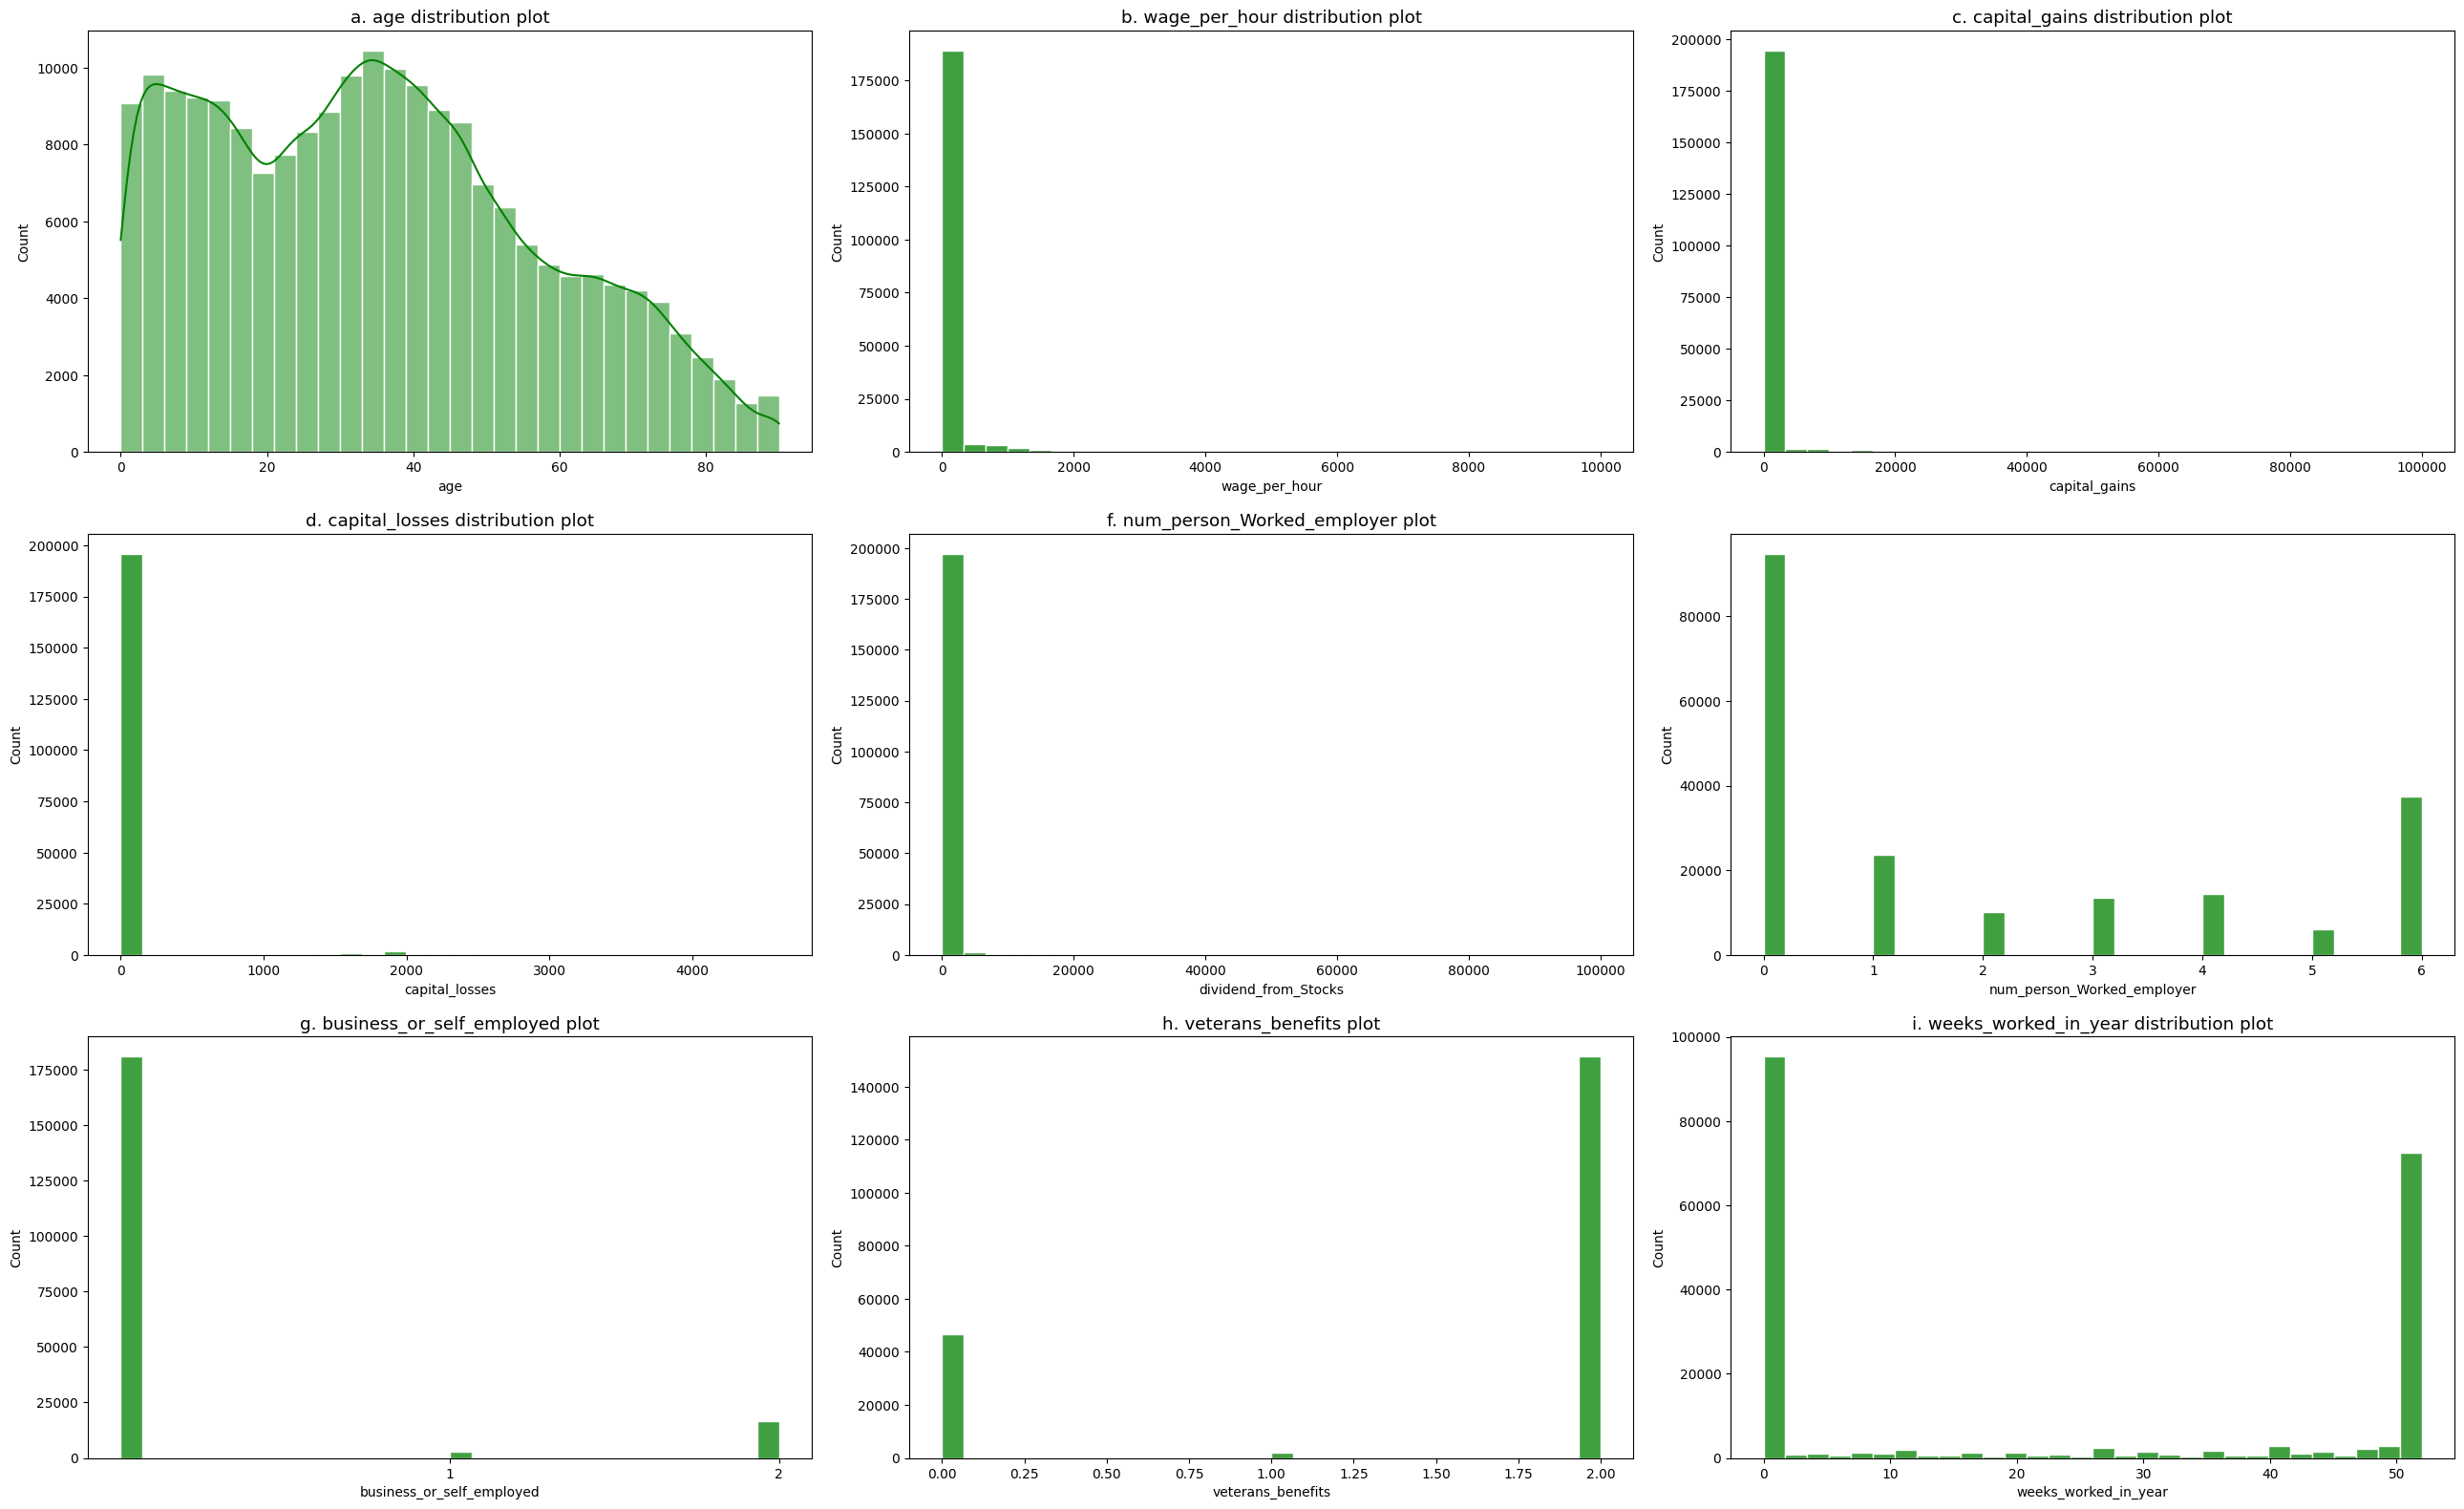

In [ ]:

fig, axes = plt.subplots(3,3, figsize=(26,16))
sns.set(font_scale=1.1)

sns.histplot(ax=axes[0,0], data=census_df, x='age', bins=30, kde=True, color='green')
axes[0,0].set_title('a. age distribution plot')

sns.histplot(ax=axes[0,1], data=census_df, x='wage_per_hour', bins=30, color='green')
axes[0,1].set_title('b. wage_per_hour distribution plot')

sns.histplot(ax=axes[0,2], data=census_df, x='capital_gains', bins=30, color='green')
axes[0,2].set_title('c. capital_gains distribution plot')

sns.histplot(ax=axes[1,0], data=census_df, x='capital_losses', bins=30, color='green')
axes[1,0].set_title('d. capital_losses distribution plot')

sns.histplot(ax=axes[1,1], data=census_df, x='dividend_from_Stocks', bins=30, color='green')
axes[1,1].set_title('de. dividend_from_Stocks distribution plot')

sns.histplot(ax=axes[1,2], data=census_df, x='num_person_Worked_employer', bins=30, color='green')
axes[1,1].set_title('f. num_person_Worked_employer plot')

sns.histplot(ax=axes[2,0], data=census_df, x='business_or_self_employed', bins=30, color='green')
axes[2,0].set_title('g. business_or_self_employed plot')
axes[2,0].set_xticks(range(1,3))

sns.histplot(ax=axes[2,1], data=census_df, x='veterans_benefits', bins=30, color='green')
axes[2,1].set_title('h. veterans_benefits plot')

sns.histplot(ax=axes[2,2], data=census_df, x='weeks_worked_in_year', bins=30, color='green')
axes[2,2].set_title('i. weeks_worked_in_year distribution plot')

fig.tight_layout()
# sns.countplot(ax=axes[2], x='habitat', hue='class', data=census_df, palette=['red', 'green'], order = df['habitat'].value_counts().index)
# axes[2].set_title('b. habitat')

### Distribution Plot of Selected Catergorical (object) Features

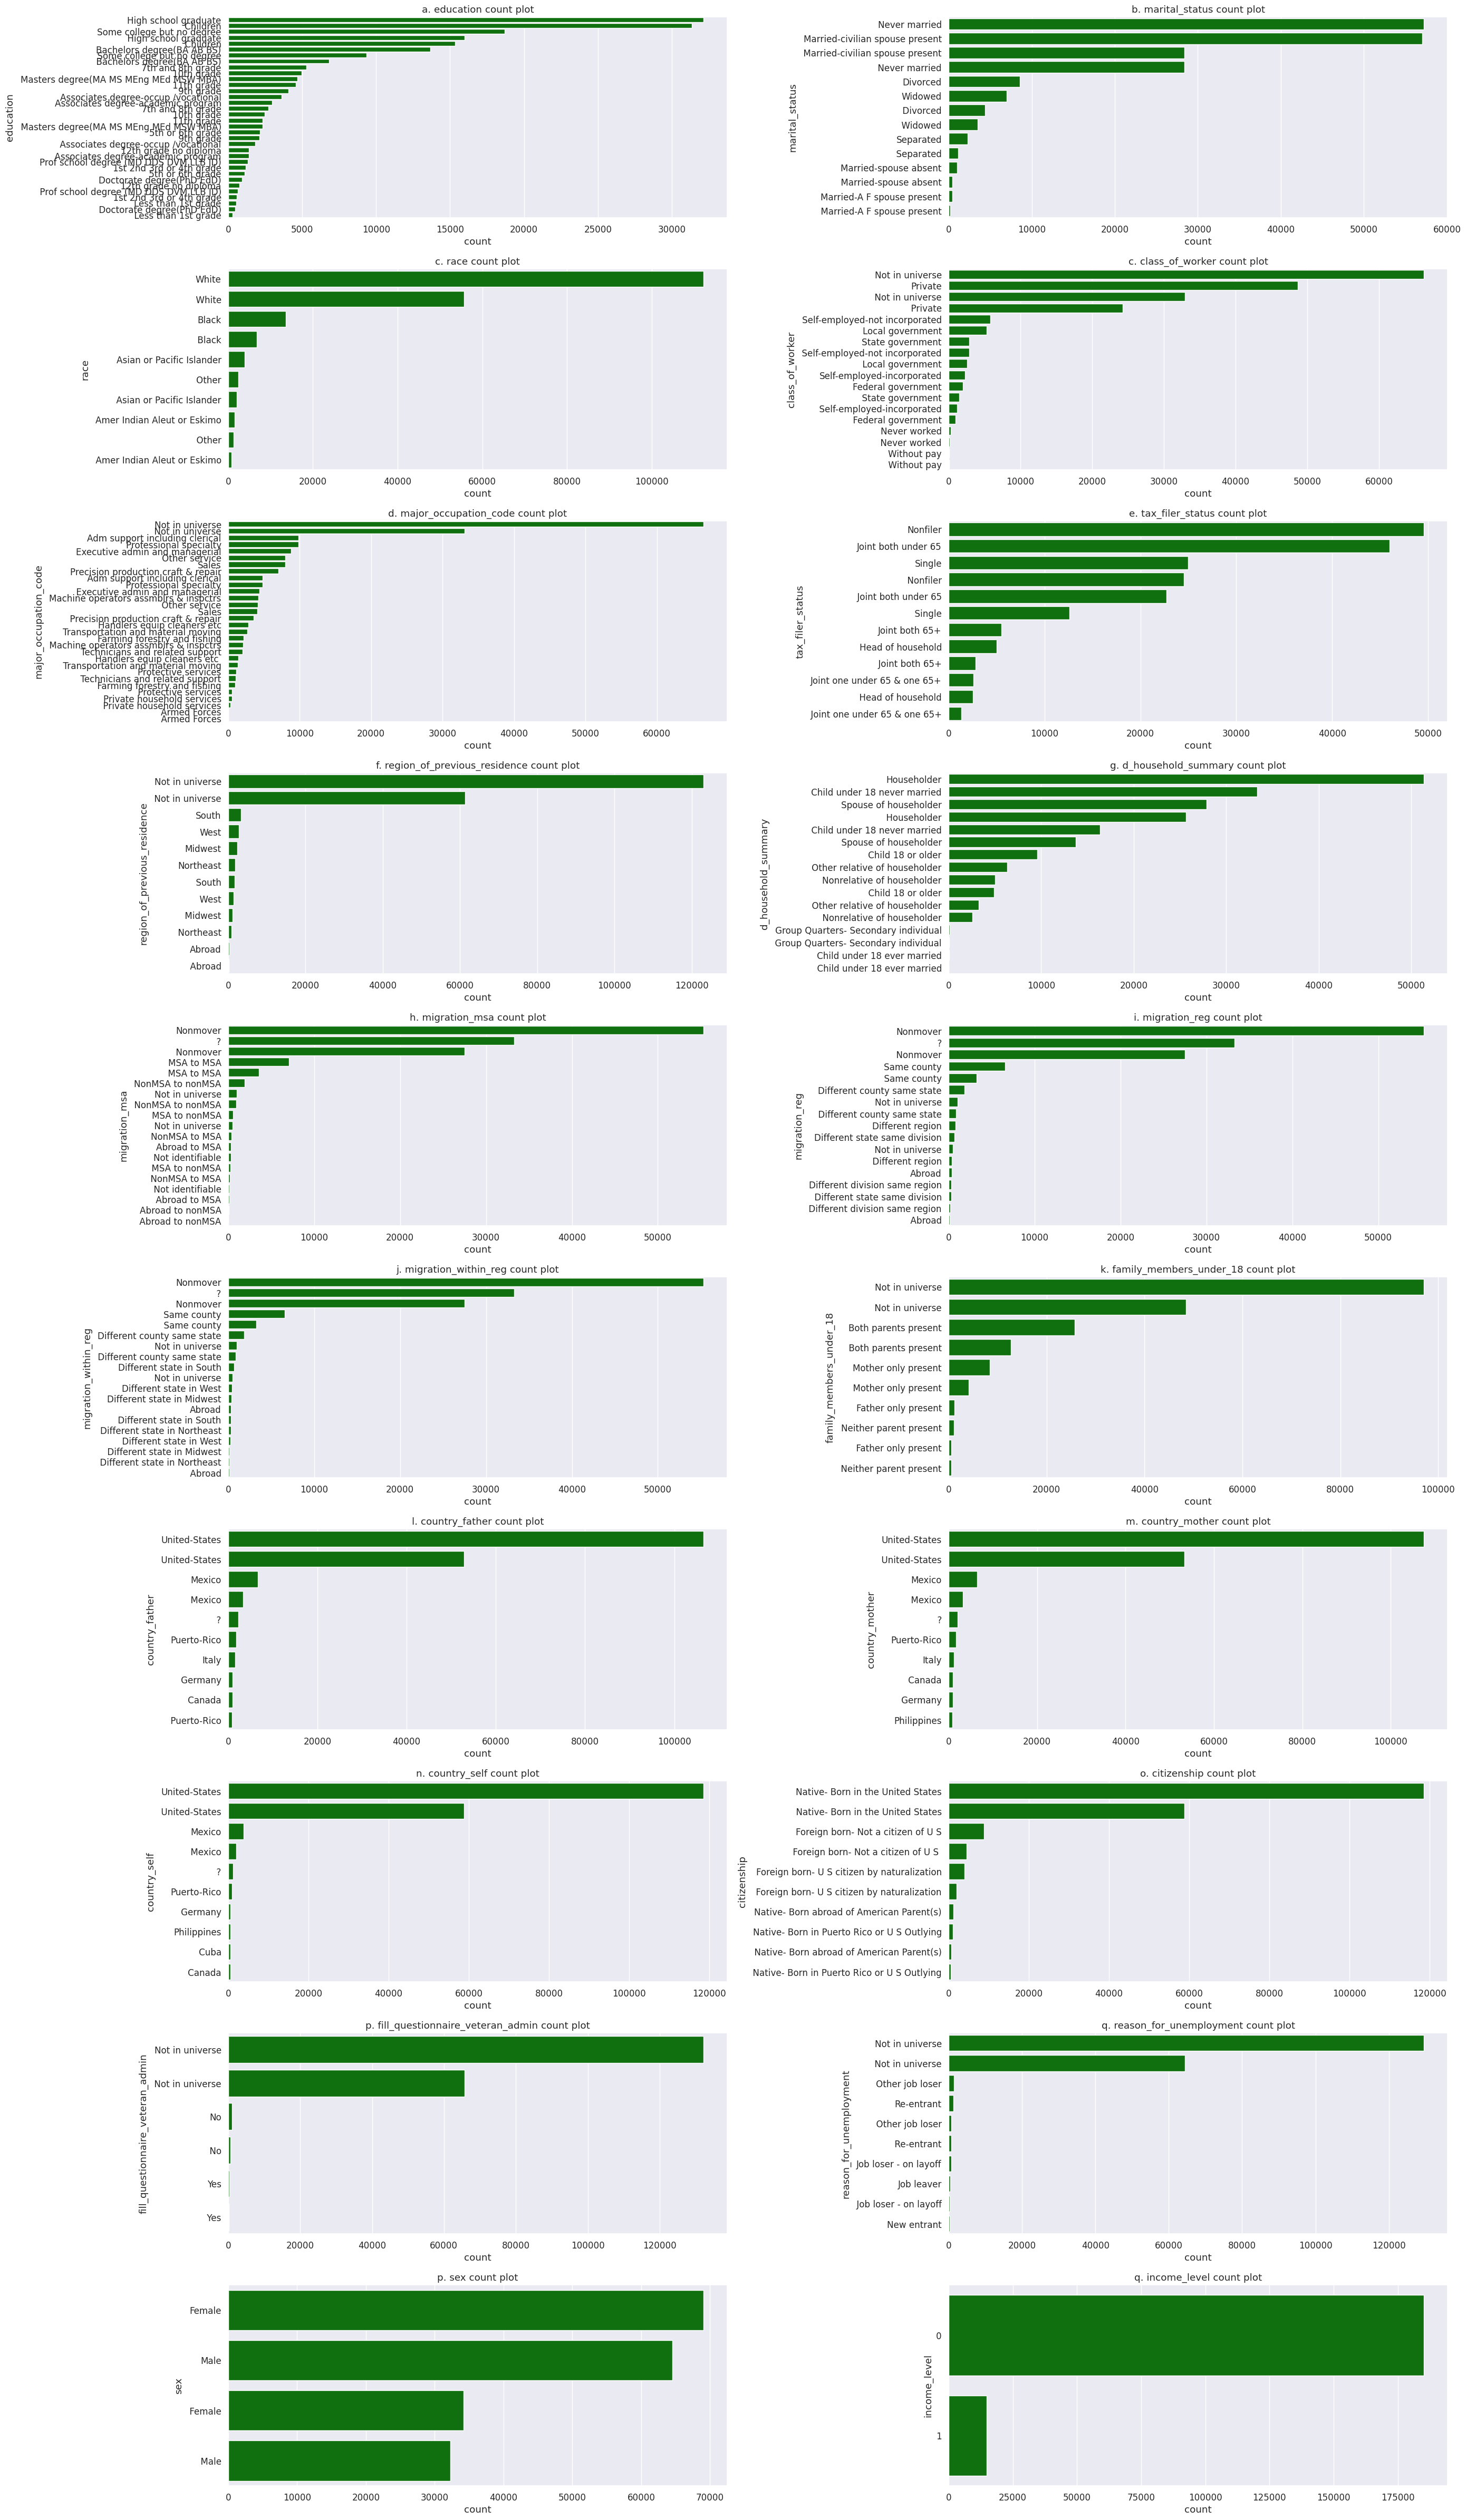

In [ ]:
# sns.set(font_scale=1.1)
# axes = axes.flatten()
fig, axes = plt.subplots(10,2, figsize=(28,48))

# fig.tight_layout()
sorted_order = census_df['education'].value_counts(ascending=False).index
sns.countplot(ax=axes[0,0], data=census_df, y='education', order=sorted_order, color='green')
axes[0,0].set_title('a. education count plot')
# axes[0,0].tick_params(axis='x', rotation=90)

sorted_order = census_df['marital_status'].value_counts(ascending=False).index
sns.countplot(ax=axes[0,1], data=census_df, y='marital_status', order=sorted_order, color='green')
axes[0,1].set_title('b. marital_status count plot')

sorted_order = census_df['race'].value_counts(ascending=False).index
sns.countplot(ax=axes[1,0], data=census_df, y='race', order=sorted_order, color='green')
axes[1,0].set_title('c. race count plot')

sorted_order = census_df['class_of_worker'].value_counts(ascending=False).index
sns.countplot(ax=axes[1,1], data=census_df, y='class_of_worker', order=sorted_order, color='green')
axes[1,1].set_title('c. class_of_worker count plot')

sorted_order = census_df['major_occupation_code'].value_counts(ascending=False).index
sns.countplot(ax=axes[2,0], data=census_df, y='major_occupation_code', order=sorted_order, color='green')
axes[2,0].set_title('d. major_occupation_code count plot')

sorted_order = census_df['tax_filer_status'].value_counts(ascending=False).index
sns.countplot(ax=axes[2,1], data=census_df, y='tax_filer_status', order=sorted_order, color='green')
axes[2,1].set_title('e. tax_filer_status count plot')

sorted_order = census_df['region_of_previous_residence'].value_counts(ascending=False).index
sns.countplot(ax=axes[3,0], data=census_df, y='region_of_previous_residence', order=sorted_order, color='green')
axes[3,0].set_title('f. region_of_previous_residence count plot')

sorted_order = census_df['d_household_summary'].value_counts(ascending=False).index
sns.countplot(ax=axes[3,1], data=census_df, y='d_household_summary', order=sorted_order, color='green')
axes[3,1].set_title('g. d_household_summary count plot')

sorted_order = census_df['migration_msa'].value_counts(ascending=False).index
sns.countplot(ax=axes[4,0], data=census_df, y='migration_msa', order=sorted_order, color='green')
axes[4,0].set_title('h. migration_msa count plot')

sorted_order = census_df['migration_reg'].value_counts(ascending=False).index
sns.countplot(ax=axes[4,1], data=census_df, y='migration_reg', order=sorted_order, color='green')
axes[4,1].set_title('i. migration_reg count plot')

sorted_order = census_df['migration_within_reg'].value_counts(ascending=False).index
sns.countplot(ax=axes[5,0], data=census_df, y='migration_within_reg', order=sorted_order, color='green')
axes[5,0].set_title('j. migration_within_reg count plot')

sorted_order = census_df['family_members_under_18'].value_counts(ascending=False).index
sns.countplot(ax=axes[5,1], data=census_df, y='family_members_under_18', order=sorted_order, color='green')
axes[5,1].set_title('k. family_members_under_18 count plot')

sorted_order = census_df['country_father'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[6,0], data=census_df, y='country_father', order=sorted_order, color='green')
axes[6,0].set_title('l. country_father count plot')

sorted_order = census_df['country_mother'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[6,1], data=census_df, y='country_mother', order=sorted_order, color='green')
axes[6,1].set_title('m. country_mother count plot')

sorted_order = census_df['country_self'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[7,0], data=census_df, y='country_self', order=sorted_order, color='green')
axes[7,0].set_title('n. country_self count plot')

sorted_order = census_df['citizenship'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[7,1], data=census_df, y='citizenship', order=sorted_order, color='green')
axes[7,1].set_title('o. citizenship count plot')

sorted_order = census_df['fill_questionnaire_veteran_admin'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[8,0], data=census_df, y='fill_questionnaire_veteran_admin', order=sorted_order, color='green')
axes[8,0].set_title('p. fill_questionnaire_veteran_admin count plot')

sorted_order = census_df['reason_for_unemployment'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[8,1], data=census_df, y='reason_for_unemployment', order=sorted_order, color='green')
axes[8,1].set_title('q. reason_for_unemployment count plot')

sorted_order = census_df['sex'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[9,0], data=census_df, y='sex', order=sorted_order, color='green')
axes[9,0].set_title('p. sex count plot')

sorted_order = census_df['income_level'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[9,1], data=census_df, y='income_level', order=sorted_order, color='green')
axes[9,1].set_title('q. income_level count plot')

plt.tight_layout()

### From the categorical column countplot overview above, we found out that some columns appear the same name twice. This happen dues to the extract space from the naming, for example, 'Unite States' and ' United States', so next, we will adjust all the naming issues.

In [ ]:
# Check unique catergoical value for all the non-numerical to overview the dataset content
for i in census_df.columns:
    if census_df[i].dtype != 'int64':
        print ("---- %s ---" % i)
        print(census_df[i].unique())

---- class_of_worker ---
['Private' 'Not in universe' ' Not in universe' ' Private'
 'Self-employed-not incorporated' ' Self-employed-not incorporated'
 'Local government' 'Self-employed-incorporated' 'Federal government'
 ' Self-employed-incorporated' 'State government' ' Federal government'
 ' State government' ' Local government' ' Never worked' 'Never worked'
 'Without pay' ' Without pay']
---- education ---
['Some college but no degree' 'Bachelors degree(BA AB BS)'
 'Masters degree(MA MS MEng MEd MSW MBA)' 'High school graduate'
 'Children' ' 9th grade' '1st 2nd 3rd or 4th grade'
 ' Bachelors degree(BA AB BS)' 'Associates degree-occup /vocational'
 '10th grade' 'Associates degree-academic program' '7th and 8th grade'
 ' High school graduate' '11th grade' ' Children'
 ' Associates degree-academic program' '5th or 6th grade'
 ' Some college but no degree' '9th grade' ' 7th and 8th grade'
 ' 10th grade' ' 11th grade' 'Doctorate degree(PhD EdD)'
 ' Associates degree-occup /vocational'

## Data Cleaning - Removing spacing and combined redundant column name values



In [ ]:
#confirm the spaces are removed and all the same columns are combined
for i in census_df.columns:
    if census_df[i].dtype != 'int64':
        census_df[i] = census_df[i].str.strip()
        print ("---- %s ---" % i)
        print(census_df[i].unique())

---- class_of_worker ---
['Private' 'Not in universe' 'Self-employed-not incorporated'
 'Local government' 'Self-employed-incorporated' 'Federal government'
 'State government' 'Never worked' 'Without pay']
---- education ---
['Some college but no degree' 'Bachelors degree(BA AB BS)'
 'Masters degree(MA MS MEng MEd MSW MBA)' 'High school graduate'
 'Children' '9th grade' '1st 2nd 3rd or 4th grade'
 'Associates degree-occup /vocational' '10th grade'
 'Associates degree-academic program' '7th and 8th grade' '11th grade'
 '5th or 6th grade' 'Doctorate degree(PhD EdD)' 'Less than 1st grade'
 '12th grade no diploma' 'Prof school degree (MD DDS DVM LLB JD)']
---- enrolled_in_edu_inst_lastwk ---
['College or university' 'Not in universe' 'High school']
---- marital_status ---
['Never married' 'Married-civilian spouse present' 'Divorced'
 'Married-spouse absent' 'Widowed' 'Married-A F spouse present'
 'Separated']
---- major_industry_code ---
['Education' 'Finance insurance and real estate'
 '

In [ ]:
# ### Convert the target column 'income_level' to cetgorical type
# census_df.income_level = census_df.income_level.astype('object')
# census_df.income_level.dtypes

### Distribution Plot of Selected Catergorical (object) Features with removing spacing and combined redundant column values (Updated Plot)


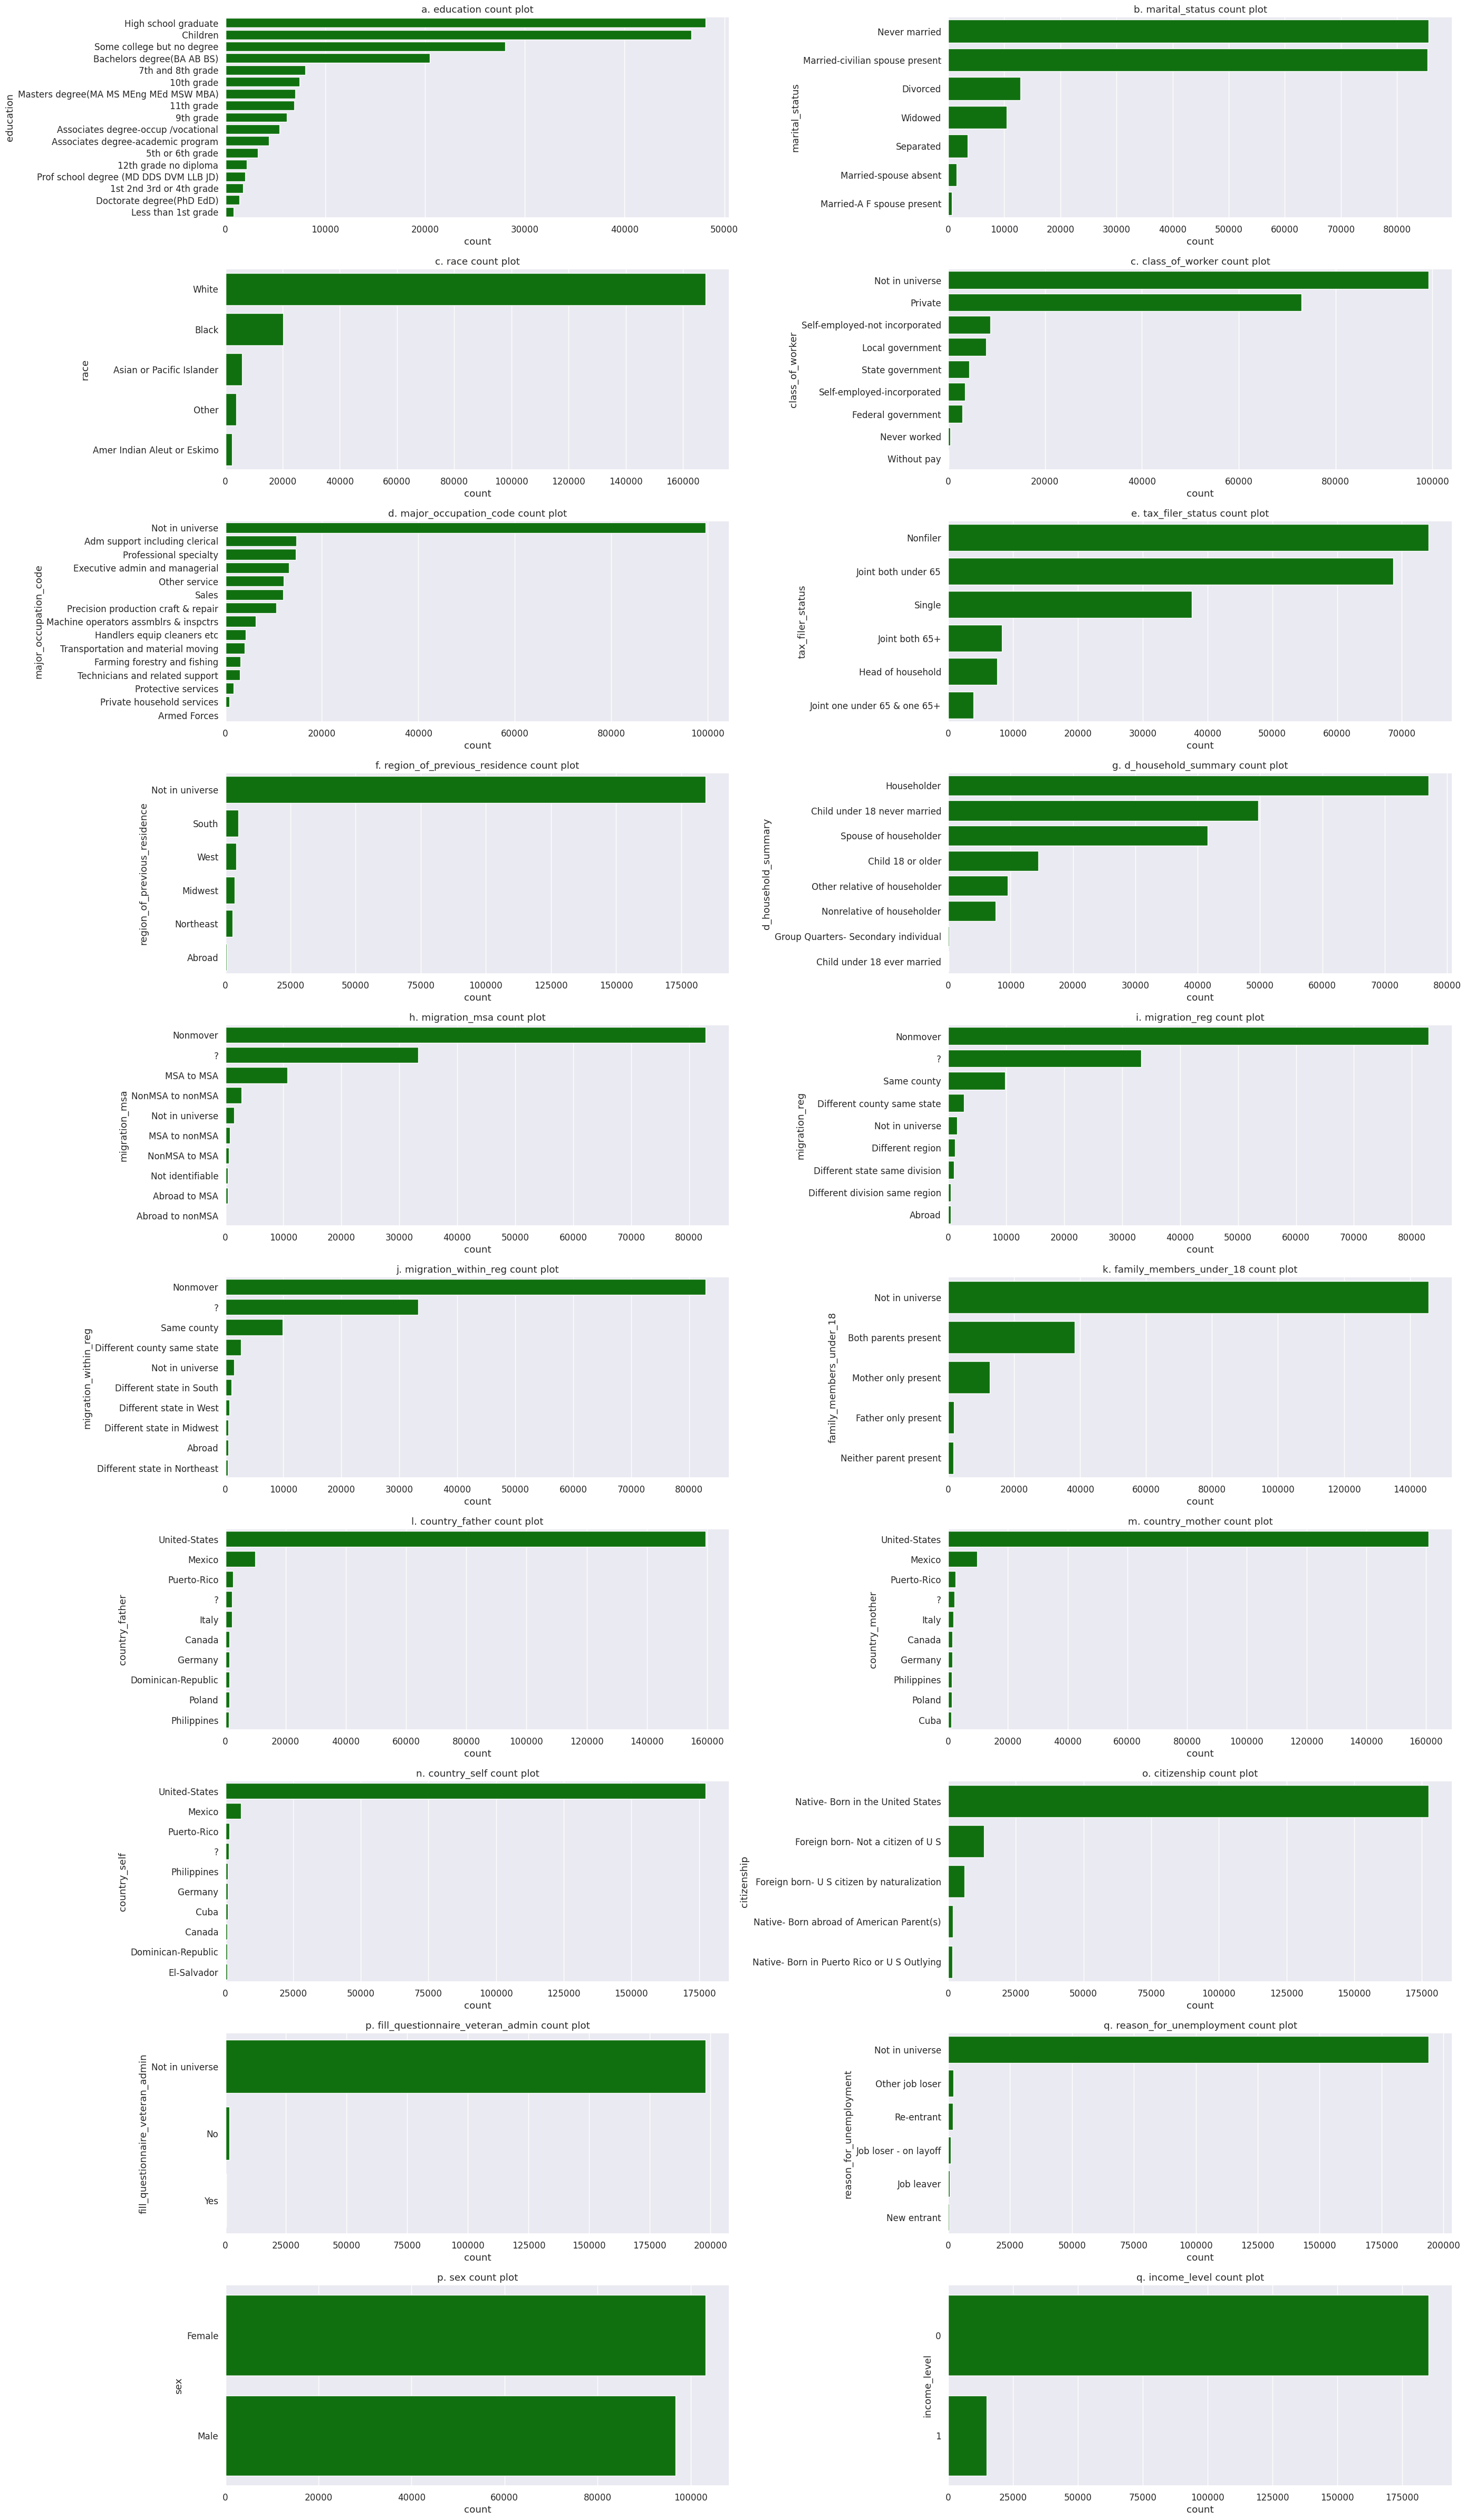

In [ ]:
# sns.set(font_scale=1.1)
# axes = axes.flatten()
fig, axes = plt.subplots(10,2, figsize=(28,48))

# fig.tight_layout()
sorted_order = census_df['education'].value_counts(ascending=False).index
sns.countplot(ax=axes[0,0], data=census_df, y='education', order=sorted_order, color='green')
axes[0,0].set_title('a. education count plot')
# axes[0,0].tick_params(axis='x', rotation=90)

sorted_order = census_df['marital_status'].value_counts(ascending=False).index
sns.countplot(ax=axes[0,1], data=census_df, y='marital_status', order=sorted_order, color='green')
axes[0,1].set_title('b. marital_status count plot')

sorted_order = census_df['race'].value_counts(ascending=False).index
sns.countplot(ax=axes[1,0], data=census_df, y='race', order=sorted_order, color='green')
axes[1,0].set_title('c. race count plot')

sorted_order = census_df['class_of_worker'].value_counts(ascending=False).index
sns.countplot(ax=axes[1,1], data=census_df, y='class_of_worker', order=sorted_order, color='green')
axes[1,1].set_title('c. class_of_worker count plot')

sorted_order = census_df['major_occupation_code'].value_counts(ascending=False).index
sns.countplot(ax=axes[2,0], data=census_df, y='major_occupation_code', order=sorted_order, color='green')
axes[2,0].set_title('d. major_occupation_code count plot')

sorted_order = census_df['tax_filer_status'].value_counts(ascending=False).index
sns.countplot(ax=axes[2,1], data=census_df, y='tax_filer_status', order=sorted_order, color='green')
axes[2,1].set_title('e. tax_filer_status count plot')

sorted_order = census_df['region_of_previous_residence'].value_counts(ascending=False).index
sns.countplot(ax=axes[3,0], data=census_df, y='region_of_previous_residence', order=sorted_order, color='green')
axes[3,0].set_title('f. region_of_previous_residence count plot')

sorted_order = census_df['d_household_summary'].value_counts(ascending=False).index
sns.countplot(ax=axes[3,1], data=census_df, y='d_household_summary', order=sorted_order, color='green')
axes[3,1].set_title('g. d_household_summary count plot')

sorted_order = census_df['migration_msa'].value_counts(ascending=False).index
sns.countplot(ax=axes[4,0], data=census_df, y='migration_msa', order=sorted_order, color='green')
axes[4,0].set_title('h. migration_msa count plot')

sorted_order = census_df['migration_reg'].value_counts(ascending=False).index
sns.countplot(ax=axes[4,1], data=census_df, y='migration_reg', order=sorted_order, color='green')
axes[4,1].set_title('i. migration_reg count plot')

sorted_order = census_df['migration_within_reg'].value_counts(ascending=False).index
sns.countplot(ax=axes[5,0], data=census_df, y='migration_within_reg', order=sorted_order, color='green')
axes[5,0].set_title('j. migration_within_reg count plot')

sorted_order = census_df['family_members_under_18'].value_counts(ascending=False).index
sns.countplot(ax=axes[5,1], data=census_df, y='family_members_under_18', order=sorted_order, color='green')
axes[5,1].set_title('k. family_members_under_18 count plot')

sorted_order = census_df['country_father'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[6,0], data=census_df, y='country_father', order=sorted_order, color='green')
axes[6,0].set_title('l. country_father count plot')

sorted_order = census_df['country_mother'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[6,1], data=census_df, y='country_mother', order=sorted_order, color='green')
axes[6,1].set_title('m. country_mother count plot')

sorted_order = census_df['country_self'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[7,0], data=census_df, y='country_self', order=sorted_order, color='green')
axes[7,0].set_title('n. country_self count plot')

sorted_order = census_df['citizenship'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[7,1], data=census_df, y='citizenship', order=sorted_order, color='green')
axes[7,1].set_title('o. citizenship count plot')

sorted_order = census_df['fill_questionnaire_veteran_admin'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[8,0], data=census_df, y='fill_questionnaire_veteran_admin', order=sorted_order, color='green')
axes[8,0].set_title('p. fill_questionnaire_veteran_admin count plot')

sorted_order = census_df['reason_for_unemployment'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[8,1], data=census_df, y='reason_for_unemployment', order=sorted_order, color='green')
axes[8,1].set_title('q. reason_for_unemployment count plot')

sorted_order = census_df['sex'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[9,0], data=census_df, y='sex', order=sorted_order, color='green')
axes[9,0].set_title('p. sex count plot')

sorted_order = census_df['income_level'].value_counts(ascending=False).head(10).index
sns.countplot(ax=axes[9,1], data=census_df, y='income_level', order=sorted_order, color='green')
axes[9,1].set_title('q. income_level count plot')

plt.tight_layout()

In [ ]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               200000 non-null  int64 
 1   class_of_worker                   200000 non-null  object
 2   industry_code                     200000 non-null  int64 
 3   occupation_code                   200000 non-null  int64 
 4   education                         200000 non-null  object
 5   wage_per_hour                     200000 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       200000 non-null  object
 7   marital_status                    200000 non-null  object
 8   major_industry_code               200000 non-null  object
 9   major_occupation_code             200000 non-null  object
 10  race                              200000 non-null  object
 11  hispanic_origin                   199408 non-null  object
 12  se

### Check any outlier in numerical columns - All 0 value not includes in the box plot

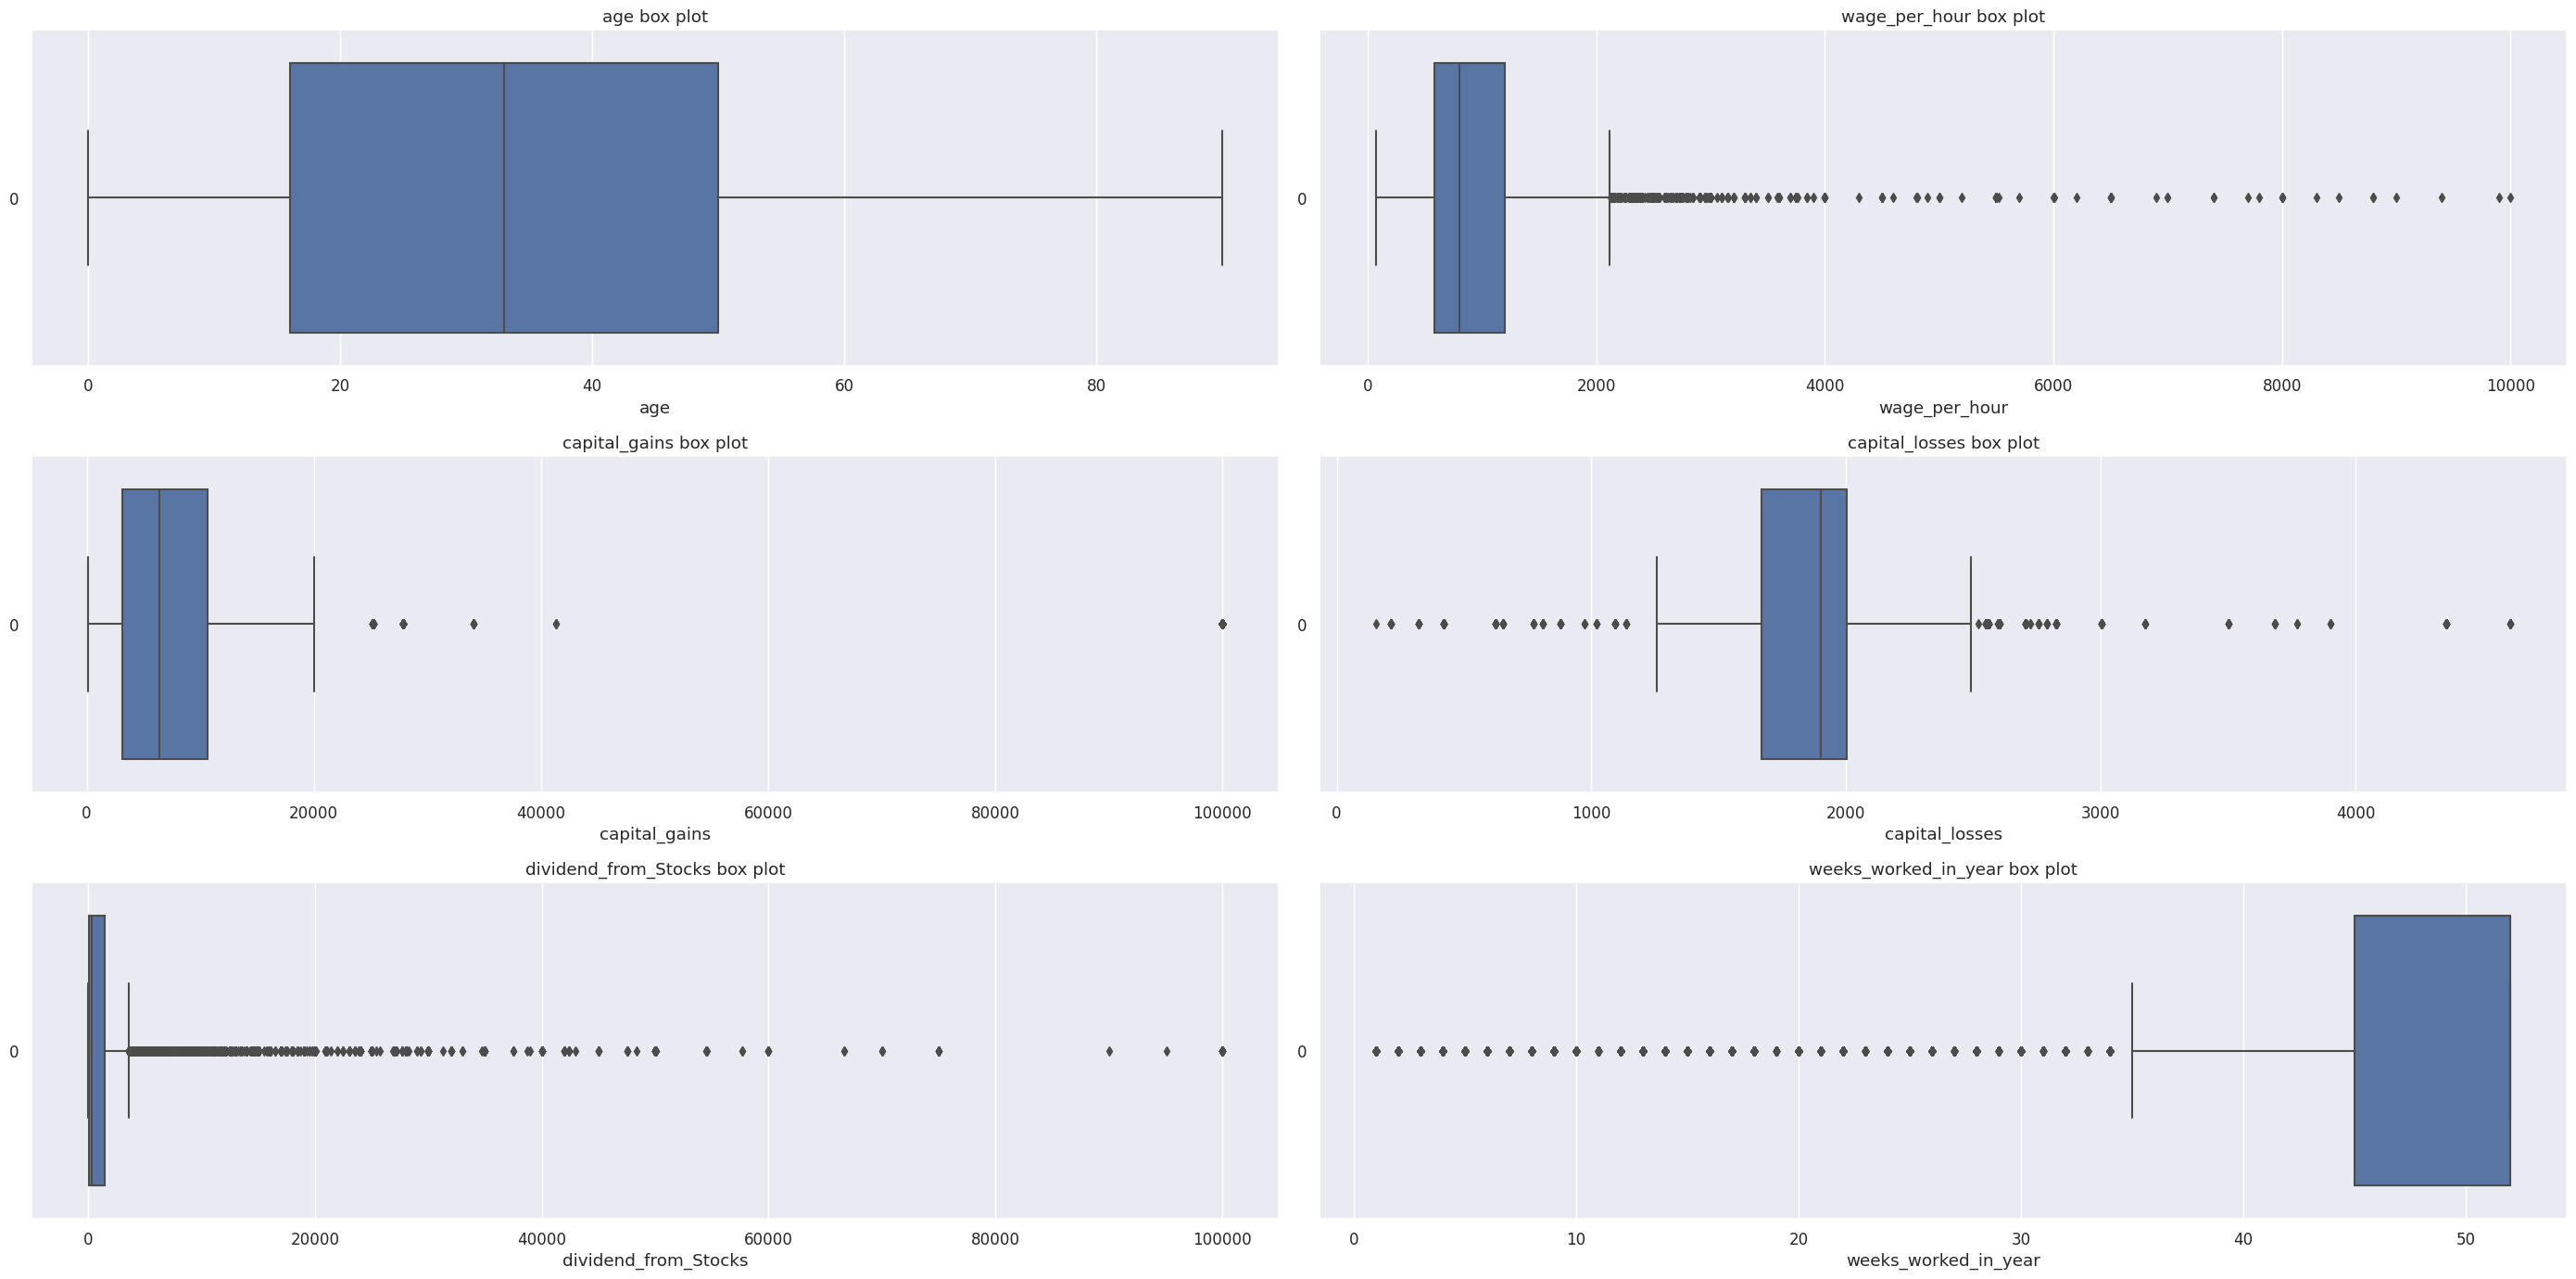

In [ ]:
# Due to large quantity of 0 in the numerical column, Remove them from the plot to make better outliers visulzation

fig, axes = plt.subplots(3,2, figsize=(28,14))
sns.set(font_scale=1.1)

age = census_df['age'].dropna()
sns.boxplot(ax = axes[0,0], data=age, orient="h")
axes[0,0].set_xlabel('age')
axes[0,0].set_title('age box plot')

wage_per_hour_wo_zero = census_df['wage_per_hour'][census_df['wage_per_hour']!= 0].reset_index().wage_per_hour
sns.boxplot(ax = axes[0,1], data=wage_per_hour_wo_zero, orient="h")
axes[0,1].set_xlabel('wage_per_hour')
axes[0,1].set_title('wage_per_hour box plot')

capital_gains_wo_zero = census_df['capital_gains'][census_df['capital_gains']!= 0].reset_index().capital_gains
sns.boxplot(ax = axes[1,0], data=capital_gains_wo_zero, orient="h")
axes[1,0].set_xlabel('capital_gains')
axes[1,0].set_title('capital_gains box plot')

capital_losses_wo_zero = census_df['capital_losses'][census_df['capital_losses']!= 0].reset_index().capital_losses
sns.boxplot(ax = axes[1,1], data=capital_losses_wo_zero, orient="h")
axes[1,1].set_xlabel('capital_losses')
axes[1,1].set_title('capital_losses box plot')

dividend_from_Stocks_wo_zero = census_df['dividend_from_Stocks'][census_df['dividend_from_Stocks']!= 0].reset_index().dividend_from_Stocks
sns.boxplot(ax = axes[2,0], data=dividend_from_Stocks_wo_zero, orient="h")
axes[2,0].set_xlabel('dividend_from_Stocks')
axes[2,0].set_title('dividend_from_Stocks box plot')

# weeks_worked_in_year= census_df[['weeks_worked_in_year']].dropna()
weeks_worked_in_year = census_df['weeks_worked_in_year'][census_df['weeks_worked_in_year']!= 0].reset_index().weeks_worked_in_year
sns.boxplot(ax = axes[2,1], data=weeks_worked_in_year, orient="h")
axes[2,1].set_xlabel('weeks_worked_in_year')
axes[2,1].set_title('weeks_worked_in_year box plot')

plt.tight_layout()

Correlation plot between each nuerical column

<ipython-input-19-efde18562509>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = census_df.corr()


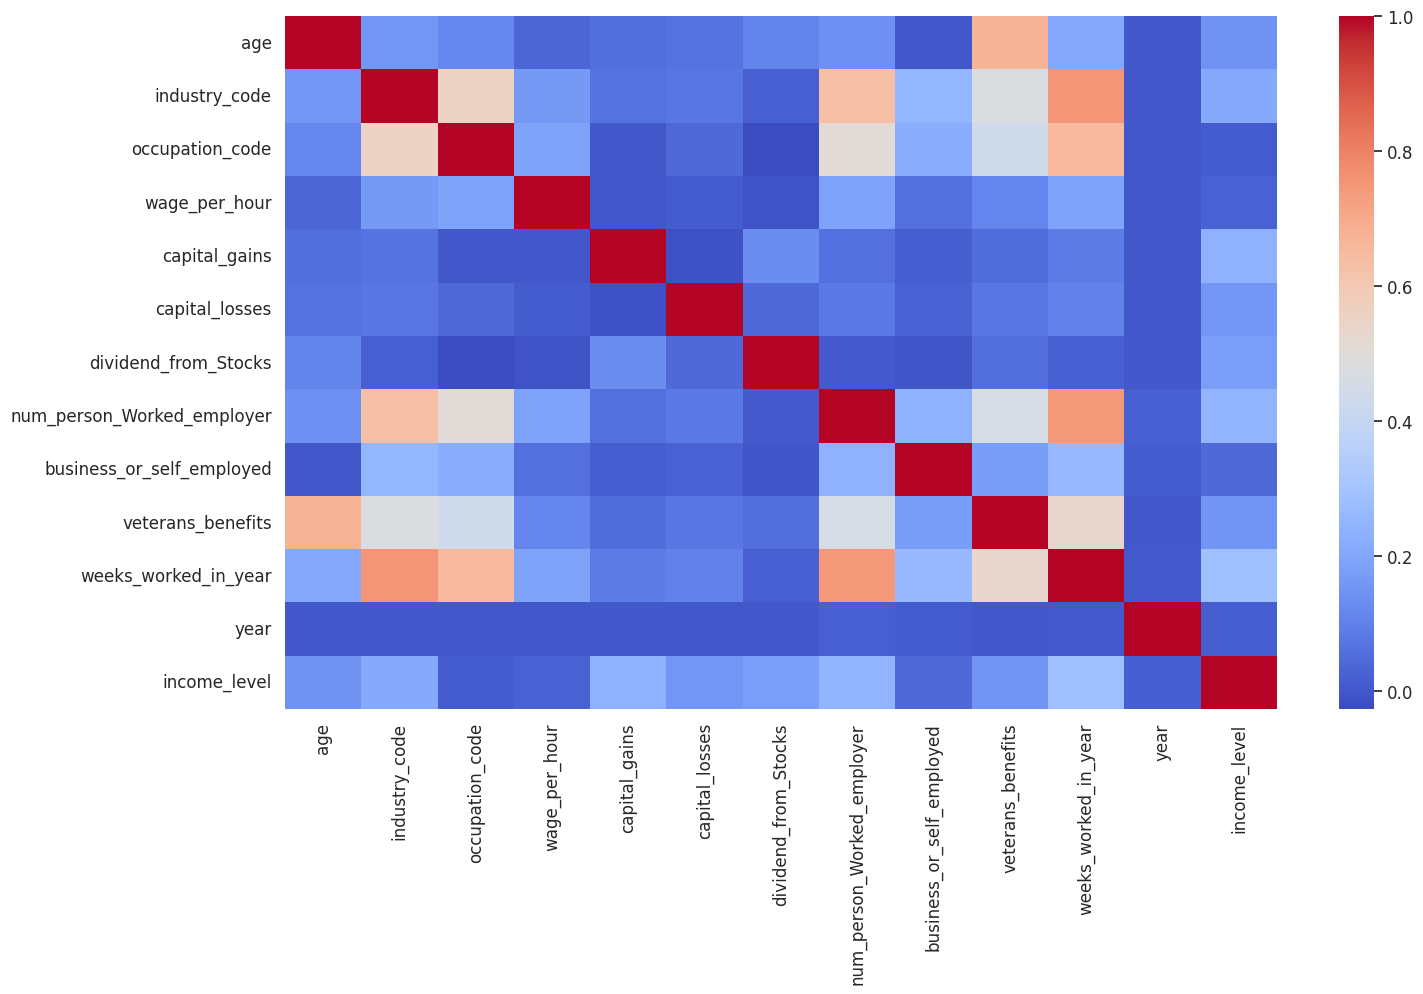

In [ ]:
correlation_matrix = census_df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

#### Save a dataframe after dropna

In [ ]:
# Create a Drop NaNs dataframe and check shape
census_df_dropna = census_df.dropna(how='any')
census_df_dropna.shape

(129681, 41)

## More Data Visualization

### WordCloud Visualization

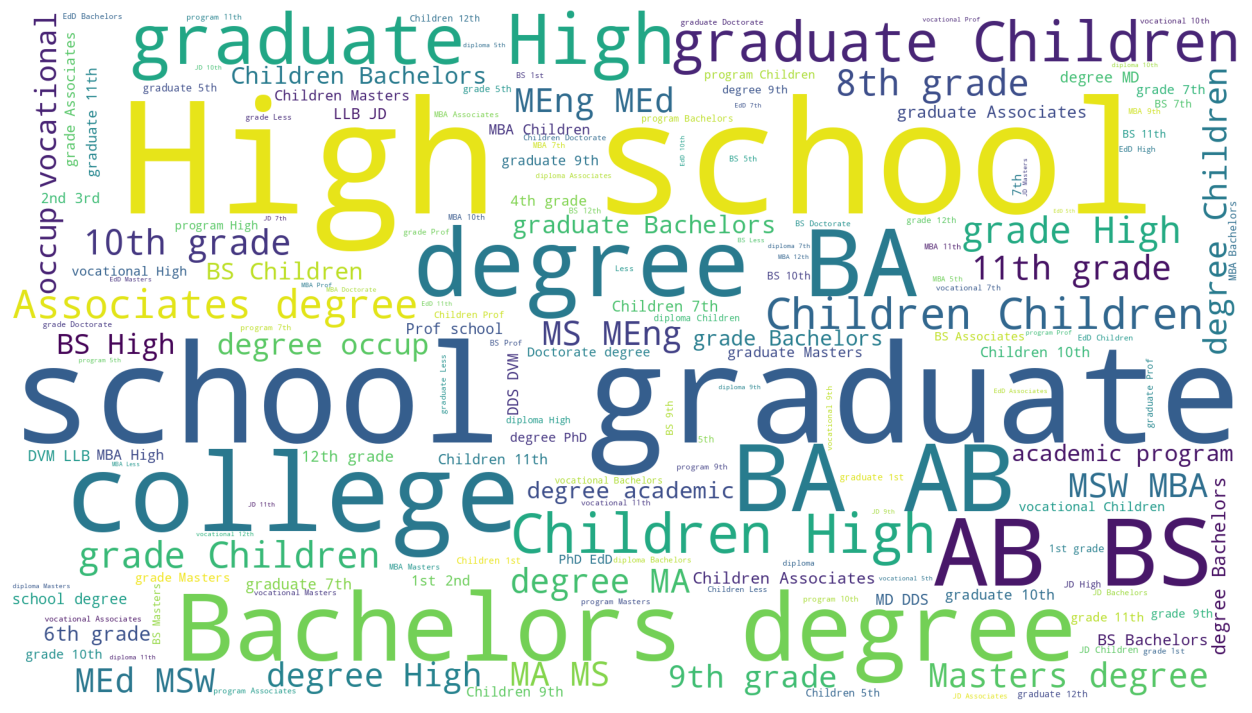

In [ ]:
from wordcloud import WordCloud

# wordcloud in 'education'
plt.subplots(figsize = (16, 9))
wordcloud=WordCloud(background_color = 'white',
                    width = 1920,
                    height = 1080
                    ).generate(" ".join(census_df.education))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

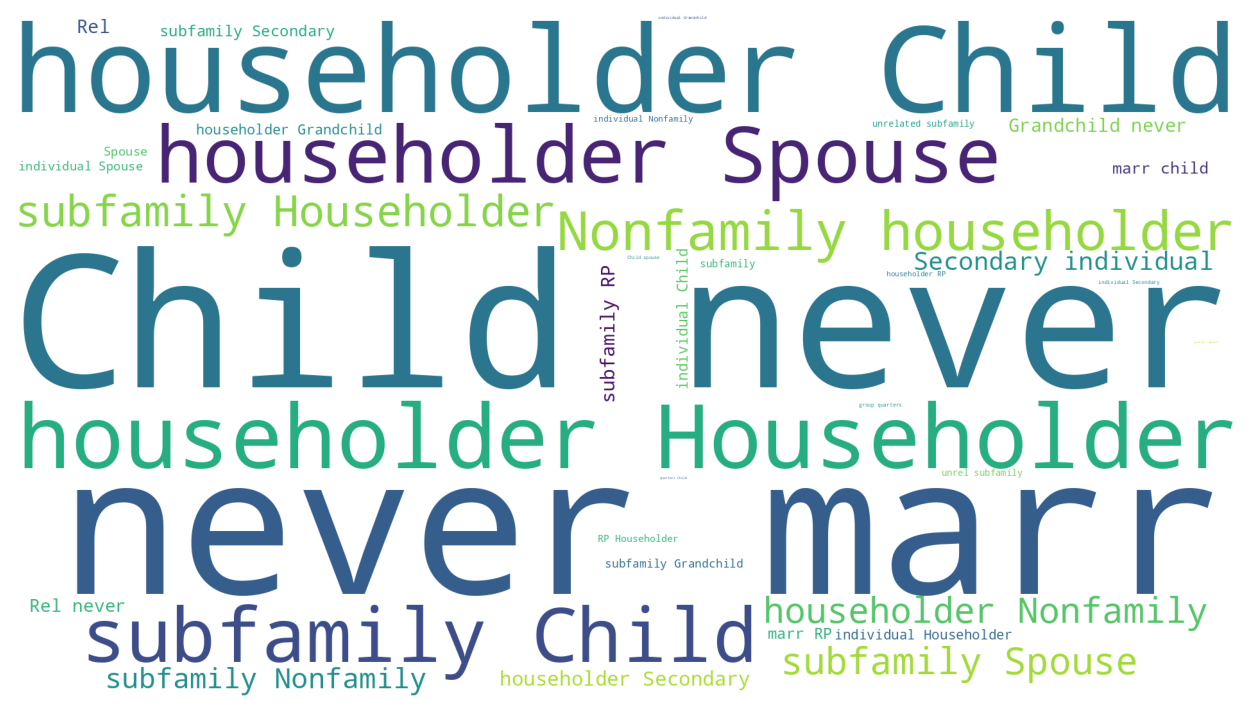

In [ ]:
# wordcloud in 'major_occupation_code'
plt.subplots(figsize = (16, 9))
wordcloud=WordCloud(background_color = 'white',
                    width = 1920,
                    height = 1080
                    ).generate(" ".join(census_df.d_household_family_stat))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Geo Map Data Visulization

In [ ]:
import geopandas as gpd
# Load the shapefile for the states
shapefile_path = '/content/drive/My Drive/Colab Notebooks/geo_data/usa-states-census-2014.shp'
states = gpd.read_file(shapefile_path)

In [ ]:
census_df_state_of_previous_residence = census_df.state_of_previous_residence.value_counts().reset_index()
census_df_state_of_previous_residence.columns=['NAME', 'count_num']
census_df_state_of_previous_residence = census_df_state_of_previous_residence.drop(0)
census_df_state_of_previous_residence = census_df_state_of_previous_residence.drop(24)

In [ ]:
# Left Join
states_merged_df = pd.merge(states, census_df_state_of_previous_residence, on='NAME', how='left')
states_merged_df.fillna(0, inplace=True)
states_merged_df['count_num'] = states_merged_df['count_num'].astype(int)

<Axes: >

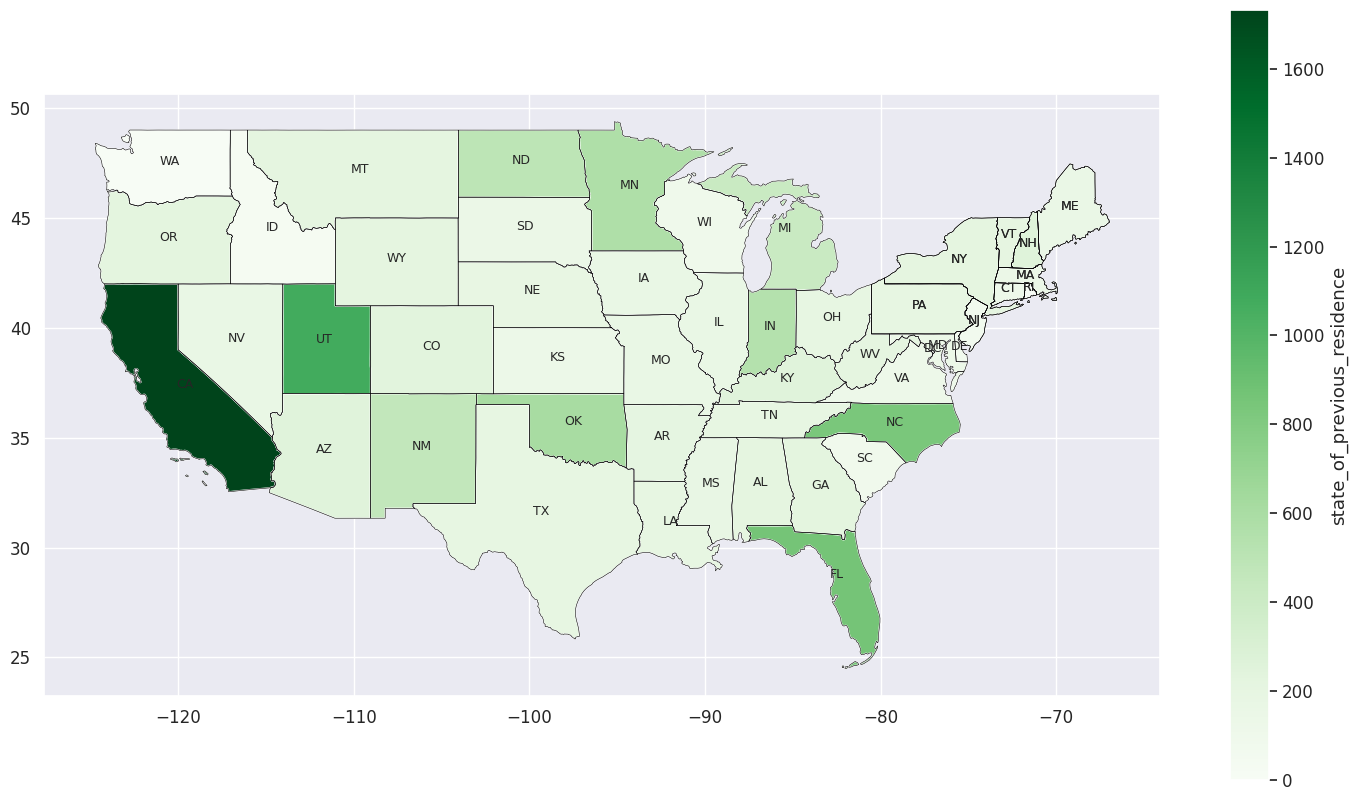

In [ ]:
fig = plt.figure(1, figsize=(18,10))
ax = fig.add_subplot()

states_merged_df.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=9),axis=1);
states_merged_df.boundary.plot(ax=ax, color='Black', linewidth=.4)

states_merged_df.plot(ax=ax, column=states_merged_df.count_num, cmap='Greens', figsize=(12, 12), legend=True, legend_kwds={'label':'state_of_previous_residence'})

### More Dimension Visualization: Plotly

In [ ]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, iplot

In [ ]:
def bar_chart(feature):
    less_than_50000 = census_df[census_df['income_level']==0][feature].value_counts()
    more_than_50000 = census_df[census_df['income_level']==1][feature].value_counts()

    bc_df = pd.DataFrame([ less_than_50000, more_than_50000])
    bc_df.index = ['Less than $50,000', 'More than $50,000']
    fig = px.bar(bc_df)
    fig.update_layout(width=800, height=600)
    fig.update_layout(xaxis_title=feature, yaxis_title="count")
    fig.update_layout(
    xaxis=dict(
        title=feature,
        title_font=dict(size=20),  # Set font size for x-axis label
        tickfont=dict(size=16)
    ),
    yaxis=dict(
        title="count",
        title_font=dict(size=20) , # Set font size for y-axis label
        tickfont=dict(size=16)
    ))
    # fig.show()
    pyo.iplot(fig)

In [ ]:
bar_chart('sex')

In [ ]:
bar_chart('education')

In [ ]:
bar_chart('class_of_worker')

In [ ]:
bar_chart('race')

In [ ]:
bar_chart('tax_filer_status')

In [ ]:
bar_chart('marital_status')

## B-1. Feature Engineering:

### Preserve Original DataFrame

In [ ]:
df_original = census_df.copy()
df_original.describe()

age  industry_code  occupation_code  wage_per_hour  \
count  200000.000000  200000.000000    200000.000000  200000.000000   
mean       34.662495      15.564830        11.326325      54.835700   
std        22.225765      18.104961        14.424809     272.034681   
min         0.000000       0.000000         0.000000       0.000000   
25%        16.000000       0.000000         0.000000       0.000000   
50%        33.000000       1.000000         1.000000       0.000000   
75%        50.000000      33.000000        26.000000       0.000000   
max        90.000000      51.000000        46.000000    9999.000000   

       capital_gains  capital_losses  dividend_from_Stocks  \
count  200000.000000   200000.000000         200000.000000   
mean      493.561580       38.921275            212.977630   
std      5109.900136      277.867944           2062.591247   
min         0.000000        0.000000              0.000000   
25%         0.000000        0.000000              0.000000   
50%         0.000000        0.000000              0.000000   
75%         0.000000        0.000000              0.000000   
max     99999.000000     4608.000000          99999.000000   

       num_person_Worked_employer  business_or_self_employed  \
count               200000.000000              200000.000000   
mean                     1.983780                   0.177995   
std                      2.372892                   0.557014   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      4.000000                   0.000000   
max                      6.000000                   2.000000   

       veterans_benefits  weeks_worked_in_year           year   income_level  
count      200000.000000         200000.000000  200000.000000  200000.000000  
mean            1.522860             23.541820      94.499800       0.074360  
std             0.846346             24.447497       0.500001       0.262357  
min             0.000000              0.000000      94.000000       0.000000  
25%             2.000000              0.000000      94.000000       0.000000  
50%             2.000000             10.000000      94.000000       0.000000  
75%             2.000000             52.000000      95.000000       0.000000  
max             2.000000             52.000000      95.000000       1.000000

## Feature Engineering: Transform "industry_code", "occupation_code"

### Seems the following 4 columns: 'major_industry_code','industry_code', 'occupation_code', 'major_occupation_code' have a lot of repetitive information, Just use one is enough. Let's keep "major_industry_code"

In [ ]:
census_df.industry_code = census_df.industry_code.astype('object')
census_df.occupation_code = census_df.occupation_code.astype('object')

census_df.major_industry_code.value_counts()

Not in universe or children            99570
Retail trade                           17069
Manufacturing-durable goods             9221
Education                               8478
Manufacturing-nondurable goods          6995
Finance insurance and real estate       6370
Construction                            6091
Business and repair services            5806
Medical except hospital                 4792
Public administration                   4717
Other professional services             4657
Transportation                          4294
Hospital services                       3973
Wholesale trade                         3707
Agriculture                             2985
Personal services except private HH     2905
Social services                         2477
Entertainment                           1644
Communications                          1227
Utilities and sanitary services         1203
Private household services               964
Mining                                   614
Forestry a

In [ ]:
census_df.drop(columns=['industry_code', 'occupation_code', 'major_occupation_code'],  inplace=True)
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               200000 non-null  int64 
 1   class_of_worker                   200000 non-null  object
 2   education                         200000 non-null  object
 3   wage_per_hour                     200000 non-null  int64 
 4   enrolled_in_edu_inst_lastwk       200000 non-null  object
 5   marital_status                    200000 non-null  object
 6   major_industry_code               200000 non-null  object
 7   race                              200000 non-null  object
 8   hispanic_origin                   199408 non-null  object
 9   sex                               200000 non-null  object
 10  member_of_labor_union             200000 non-null  object
 11  reason_for_unemployment           200000 non-null  object
 12  fu

### race, hispanic_origin

In [ ]:
print('race value_counts:\n', census_df.race.value_counts())
print('\nhispanic_origin value_counts:\n', census_df.hispanic_origin.value_counts())
dist_hispanic_origin = census_df[['hispanic_origin', 'income_level']].groupby(['hispanic_origin']).agg({'income_level':[np.mean,np.std]})
print('\ndistribution of hispanic origin:\n', dist_hispanic_origin)

race value_counts:
 White                          167912
Black                           20216
Asian or Pacific Islander        5888
Other                            3704
Amer Indian Aleut or Eskimo      2280
Name: race, dtype: int64

hispanic_origin value_counts:
 All other                    172545
Mexican-American               8057
Mexican (Mexicano)             7157
Central or South American      3916
Puerto Rican                   3220
Other Spanish                  2511
Cuban                          1140
Chicano                         304
Do not know                     295
NA                              263
Name: hispanic_origin, dtype: int64

distribution of hispanic origin:
                           income_level          
                                  mean       std
hispanic_origin                                 
All other                     0.081840  0.274121
Central or South American     0.024515  0.154661
Chicano                       0.032895  0.178655
Cuban   

In [ ]:
census_df['is_hispanic'] = 1
census_df.loc[census_df.hispanic_origin == 'All other', 'is_hispanic'] = 0
print("distribution of hispanic:\n", census_df[['is_hispanic', 'income_level']].groupby(['is_hispanic']).agg({'income_level':[np.mean,np.std]}))

distribution of hispanic:
             income_level          
                    mean       std
is_hispanic                       
0               0.081840  0.274121
1               0.027354  0.163115


### marital_status

In [ ]:
dist_marital_status = census_df[['marital_status', 'income_level']].groupby(['marital_status']).agg({'income_level':[np.mean,np.std]})
print('distribution of marital_status:\n', dist_marital_status)

distribution of marital_status:
                                 income_level          
                                        mean       std
marital_status                                        
Divorced                            0.098544  0.298060
Married-A F spouse present          0.025564  0.157949
Married-civilian spouse present     0.135159  0.341896
Married-spouse absent               0.072338  0.259133
Never married                       0.015587  0.123873
Separated                           0.053695  0.225448
Widowed                             0.038955  0.193497


### Investment: capital_gains, capital_losses, dividend_from_Stocks

### We don't want use income to do trivial prediction on income. But they are highly positive related to income level. So the idea here is to aggregate the three features into one binary feature, "has_investment".

In [ ]:
print("Gain:", census_df.income_level.loc[census_df.capital_gains > 0].mean())
print("Loss:", census_df.income_level.loc[census_df.capital_losses > 0].mean())
print("Dividend:", census_df.income_level.loc[census_df.dividend_from_Stocks > 0].mean())

print("\nGain:\n", census_df[['capital_gains', 'income_level']].groupby(['capital_gains']).agg({'income_level':[np.mean,np.std]}))
print("\nLoss:\n", census_df[['capital_losses', 'income_level']].groupby(['capital_losses']).agg({'income_level':[np.mean,np.std]}))
print("\nDividend:\n", census_df[['dividend_from_Stocks', 'income_level']].groupby(['dividend_from_Stocks']).agg({'income_level':[np.mean,np.std]}))

print("\nRich:\n", census_df.income_level.loc[census_df.dividend_from_Stocks == 99999])

Gain: 0.36755857124567914
Loss: 0.34362745098039216
Dividend: 0.2896613995485327

Gain:
               income_level          
                      mean       std
capital_gains                       
0                 0.062444  0.241960
114               0.000000  0.000000
401               0.000000  0.000000
594               0.000000  0.000000
914               0.000000  0.000000
...                    ...       ...
25236             1.000000  0.000000
27828             1.000000  0.000000
34095             0.000000  0.000000
41310             0.000000  0.000000
99999             0.888651  0.314901

[130 rows x 2 columns]

Loss:
                income_level          
                       mean       std
capital_losses                       
0                  0.068753  0.253034
155                0.000000       NaN
213                0.000000  0.000000
323                0.545455  0.522233
419                0.000000  0.000000
...                     ...       ...
3683               

In [ ]:
census_df['has_investment'] = 0
census_df.loc[census_df.capital_gains > 0, 'has_investment'] = 1
census_df.loc[census_df.capital_losses > 0, 'has_investment'] = 1
census_df.loc[census_df.dividend_from_Stocks > 0, 'has_investment'] = 1
print("Has Investment:", census_df[['has_investment', 'income_level']].groupby(['has_investment']).agg({'income_level':[np.mean,np.std]}))

Has Investment:                income_level          
                       mean       std
has_investment                       
0                  0.036318  0.187081
1                  0.284456  0.451162


In [ ]:
census_df.drop(columns=['capital_gains', 'capital_losses', 'dividend_from_Stocks'], inplace=True)
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               200000 non-null  int64 
 1   class_of_worker                   200000 non-null  object
 2   education                         200000 non-null  object
 3   wage_per_hour                     200000 non-null  int64 
 4   enrolled_in_edu_inst_lastwk       200000 non-null  object
 5   marital_status                    200000 non-null  object
 6   major_industry_code               200000 non-null  object
 7   race                              200000 non-null  object
 8   hispanic_origin                   199408 non-null  object
 9   sex                               200000 non-null  object
 10  member_of_labor_union             200000 non-null  object
 11  reason_for_unemployment           200000 non-null  object
 12  fu

### Feature Engineering - Transform "class_of_worker"

In [ ]:
census_df.class_of_worker.value_counts()

Not in universe                   99144
Private                           72923
Self-employed-not incorporated     8694
Local government                   7878
State government                   4360
Self-employed-incorporated         3492
Federal government                 2942
Never worked                        426
Without pay                         141
Name: class_of_worker, dtype: int64

In [ ]:
dist_class_of_worker = census_df[['class_of_worker', 'income_level']].groupby(['class_of_worker']).agg({'income_level':[np.mean,np.std]})
print('distribution of class_of_worker:\n', dist_class_of_worker)

distribution of class_of_worker:
                                income_level          
                                       mean       std
class_of_worker                                      
Federal government                 0.236574  0.425051
Local government                   0.129855  0.336165
Never worked                       0.004695  0.068438
Not in universe                    0.010671  0.102750
Private                            0.121018  0.326150
Self-employed-incorporated         0.393184  0.488527
Self-employed-not incorporated     0.148263  0.355381
State government                   0.138761  0.345737
Without pay                        0.007092  0.084215


In [ ]:
census_df.loc[census_df.class_of_worker == 'Not in universe', 'class_of_worker'] = 'not_paid_worker'
census_df.loc[census_df.class_of_worker == 'Never worked', 'class_of_worker'] = 'not_paid_worker'
census_df.loc[census_df.class_of_worker == 'Without pay', 'class_of_worker'] = 'not_paid_worker'

In [ ]:
dist_class_of_worker = census_df[['class_of_worker', 'income_level']].groupby(['class_of_worker']).agg({'income_level':[np.mean,np.std]})
print(dist_class_of_worker)

                               income_level          
                                       mean       std
class_of_worker                                      
Federal government                 0.236574  0.425051
Local government                   0.129855  0.336165
Private                            0.121018  0.326150
Self-employed-incorporated         0.393184  0.488527
Self-employed-not incorporated     0.148263  0.355381
State government                   0.138761  0.345737
not_paid_worker                    0.010641  0.102604


In [ ]:
print('distribution of class_of_worker (updated):\n', census_df.class_of_worker.value_counts())

distribution of class_of_worker (updated):
 not_paid_worker                   99711
Private                           72923
Self-employed-not incorporated     8694
Local government                   7878
State government                   4360
Self-employed-incorporated         3492
Federal government                 2942
Name: class_of_worker, dtype: int64


### Feature Engineering - Transform "education"

#### make it from categoical to numberic: years of education

In [ ]:
# census_df.education.value_counts()
census_df.education = census_df.education.str.strip()
census_df.education.value_counts()

High school graduate                      48114
Children                                  46693
Some college but no degree                28046
Bachelors degree(BA AB BS)                20467
7th and 8th grade                          7986
10th grade                                 7440
Masters degree(MA MS MEng MEd MSW MBA)     7003
11th grade                                 6923
9th grade                                  6151
Associates degree-occup /vocational        5441
Associates degree-academic program         4379
5th or 6th grade                           3259
12th grade no diploma                      2146
Prof school degree (MD DDS DVM LLB JD)     1959
1st 2nd 3rd or 4th grade                   1785
Doctorate degree(PhD EdD)                  1385
Less than 1st grade                         823
Name: education, dtype: int64

In [ ]:
census_df['education_years'] = 0
census_df.loc[census_df.education == 'High school graduate', 'education_years'] = 12
census_df.loc[census_df.education == 'Children', 'education_years'] = 0
census_df.loc[census_df.education == 'Some college but no degree', 'education_years'] = 13
census_df.loc[census_df.education == 'Bachelors degree(BA AB BS)', 'education_years'] = 16
census_df.loc[census_df.education == '7th and 8th grade', 'education_years'] = 7.5
census_df.loc[census_df.education == '10th grade', 'education_years'] = 10
census_df.loc[census_df.education == '11th grade', 'education_years'] = 11
census_df.loc[census_df.education == '9th grade', 'education_years'] = 9
census_df.loc[census_df.education == 'Associates degree-occup /vocational', 'education_years'] = 14
census_df.loc[census_df.education == 'Associates degree-academic program', 'education_years'] = 15
census_df.loc[census_df.education == '5th or 6th grade', 'education_years'] = 5.5
census_df.loc[census_df.education == '12th grade no diploma', 'education_years'] = 11.5
census_df.loc[census_df.education == 'Masters degree(MA MS MEng MEd MSW MBA)', 'education_years'] = 18
census_df.loc[census_df.education == 'Prof school degree (MD DDS DVM LLB JD)', 'education_years'] = 19
census_df.loc[census_df.education == 'Doctorate degree(PhD EdD)', 'education_years'] = 21
census_df.loc[census_df.education == 'Less than 1st grade', 'education_years'] = 0.5

print('education_years describe:\n', census_df['education_years'].describe())

print('\neducation_years value counts sorted:\n', census_df['education_years'].value_counts().sort_index())

education_years describe:
 count    200000.000000
mean          9.562395
std           5.987608
min           0.000000
25%           5.500000
50%          12.000000
75%          13.000000
max          21.000000
Name: education_years, dtype: float64

education_years value counts sorted:
 0.0     48478
0.5       823
5.5      3259
7.5      7986
9.0      6151
10.0     7440
11.0     6923
11.5     2146
12.0    48114
13.0    28046
14.0     5441
15.0     4379
16.0    20467
18.0     7003
19.0     1959
21.0     1385
Name: education_years, dtype: int64


In [ ]:
dist_education = census_df[['education', 'income_level']].groupby(['education']).agg({'income_level':[np.mean,np.std]})
print('distribution of education:\n', dist_education)

distribution of education:
                                        income_level          
                                               mean       std
education                                                    
10th grade                                 0.010753  0.103143
11th grade                                 0.013433  0.115130
12th grade no diploma                      0.016775  0.128459
1st 2nd 3rd or 4th grade                   0.009524  0.097151
5th or 6th grade                           0.009205  0.095516
7th and 8th grade                          0.009517  0.097094
9th grade                                  0.007316  0.085226
Associates degree-academic program         0.107787  0.310147
Associates degree-occup /vocational        0.090057  0.286290
Bachelors degree(BA AB BS)                 0.231006  0.421487
Children                                   0.000000  0.000000
Doctorate degree(PhD EdD)                  0.563899  0.496079
High school graduate                      

In [ ]:
census_df['college_graduate'] = 0
census_df.loc[census_df.education == 'Bachelors degree(BA AB BS)', 'college_graduate'] = 1
census_df.loc[census_df.education == 'Masters degree(MA MS MEng MEd MSW MBA)', 'college_graduate'] = 1
census_df.loc[census_df.education == 'Prof school degree (MD DDS DVM LLB JD)', 'college_graduate'] = 1
census_df.loc[census_df.education == 'Doctorate degree(PhD EdD)', 'college_graduate'] = 1

census_df['prof_doctorate'] = 0
census_df.loc[census_df.education == 'Prof school degree (MD DDS DVM LLB JD)', 'prof_doctorate'] = 1
census_df.loc[census_df.education == 'Doctorate degree(PhD EdD)', 'prof_doctorate'] = 1

In [ ]:
census_df.drop(columns=['education'], inplace=True)
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 39 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   age                               200000 non-null  int64  
 1   class_of_worker                   200000 non-null  object 
 2   wage_per_hour                     200000 non-null  int64  
 3   enrolled_in_edu_inst_lastwk       200000 non-null  object 
 4   marital_status                    200000 non-null  object 
 5   major_industry_code               200000 non-null  object 
 6   race                              200000 non-null  object 
 7   hispanic_origin                   199408 non-null  object 
 8   sex                               200000 non-null  object 
 9   member_of_labor_union             200000 non-null  object 
 10  reason_for_unemployment           200000 non-null  object 
 11  full_parttime_employment_stat     200000 non-null  o

### Feature Engineering: Immigration Background

In [ ]:
census_df['immigration'] = "not_assigned"

census_df.loc[((census_df.country_self.isna()) | (census_df.country_self =='?')) & ((census_df.country_father =='United-States')  | (census_df.country_mother =='United-States' )), 'country_self'] = 'United-States'
census_df.loc[((census_df.country_self.isna()) | (census_df.country_self =='?')) & (census_df.country_father !='?' ) & (census_df.country_father.notna() ), 'country_self'] = census_df.loc[((census_df.country_self.isna()) | (census_df.country_self =='?')) & (census_df.country_father !='?' ) & (census_df.country_father.notna() ), 'country_father']
census_df.loc[((census_df.country_self.isna()) | (census_df.country_self =='?')) & (census_df.country_mother !='?' ) & (census_df.country_mother.notna() ), 'country_self'] = census_df.loc[((census_df.country_self.isna()) | (census_df.country_self =='?')) & (census_df.country_mother !='?' ) & (census_df.country_mother.notna() ), 'country_mother']

census_df.loc[census_df.country_self == 'United-States', 'immigration'] = 'United-States'
census_df.loc[(census_df.country_self== 'India' ) | (census_df.country_self== 'China' )  | (census_df.country_self== 'Iran' )  | (census_df.country_self== 'Taiwan' ) | (census_df.country_self== 'Korea' ),'immigration' ] = 'Tech-Educational'
census_df.loc[(census_df.country_self== 'Germany' ) | (census_df.country_self== 'Canada' )  | (census_df.country_self== 'England' )  | (census_df.country_self== 'Italy' ) | (census_df.country_self== 'Greece' ),'immigration' ] = 'Developed'
census_df.loc[(census_df.country_self== 'Japan' ) | (census_df.country_self== 'Portugal' )  | (census_df.country_self== 'Ireland' ),'immigration' ] = 'Developed'
census_df.loc[(census_df.country_self== 'France' ) |(census_df.country_self== 'Scotland' ) | (census_df.country_self== 'Holand-Netherlands' ),'immigration' ] = 'Developed'
census_df.loc[(census_df.immigration == 'not_assigned' ) & (census_df.country_self !='?' ) & (census_df.country_self.notna() ), 'immigration'] = 'Developing'

print(census_df['immigration'].value_counts())

census_df.drop(columns=['country_self', 'country_father', 'country_mother'], inplace=True)
census_df.info()

United-States       177628
Developing           14580
Developed             3589
not_assigned          2869
Tech-Educational      1334
Name: immigration, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   age                               200000 non-null  int64  
 1   class_of_worker                   200000 non-null  object 
 2   wage_per_hour                     200000 non-null  int64  
 3   enrolled_in_edu_inst_lastwk       200000 non-null  object 
 4   marital_status                    200000 non-null  object 
 5   major_industry_code               200000 non-null  object 
 6   race                              200000 non-null  object 
 7   hispanic_origin                   199408 non-null  object 
 8   sex                               200000 non-null  object 
 9   member_of_lab

### Drop More Columns

* wage_per_hour : not to use income predict income
* d_household_family_stat : use d_household_summary instead
* region_of_previous_residence: migration
* migration_msa: migration
* migration_reg: migration
* migration_within_re: migration
* live_1_year_ago: migration
* migration_sunbelt: migration
* business_or_self_employed: covered in class_of_worker
* year

In [ ]:
census_df.drop(columns=['d_household_family_stat', 'migration_msa', 'migration_reg', 'migration_within_reg', 'migration_sunbelt', 'live_1_year_ago', 'business_or_self_employed', 'wage_per_hour', 'weeks_worked_in_year', 'year' ], inplace=True)
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   age                               200000 non-null  int64  
 1   class_of_worker                   200000 non-null  object 
 2   enrolled_in_edu_inst_lastwk       200000 non-null  object 
 3   marital_status                    200000 non-null  object 
 4   major_industry_code               200000 non-null  object 
 5   race                              200000 non-null  object 
 6   hispanic_origin                   199408 non-null  object 
 7   sex                               200000 non-null  object 
 8   member_of_labor_union             200000 non-null  object 
 9   reason_for_unemployment           200000 non-null  object 
 10  full_parttime_employment_stat     200000 non-null  object 
 11  tax_filer_status                  200000 non-null  o

### Save a refine dataset here after feature engeineer if needed

In [ ]:
# census_df.to_csv('/content/drive/My Drive/Colab Notebooks/census_df_refined_1.csv', index=False)

### B-2. More Data Visualization After Feature Engineering

### Features vs. Income_level Plot



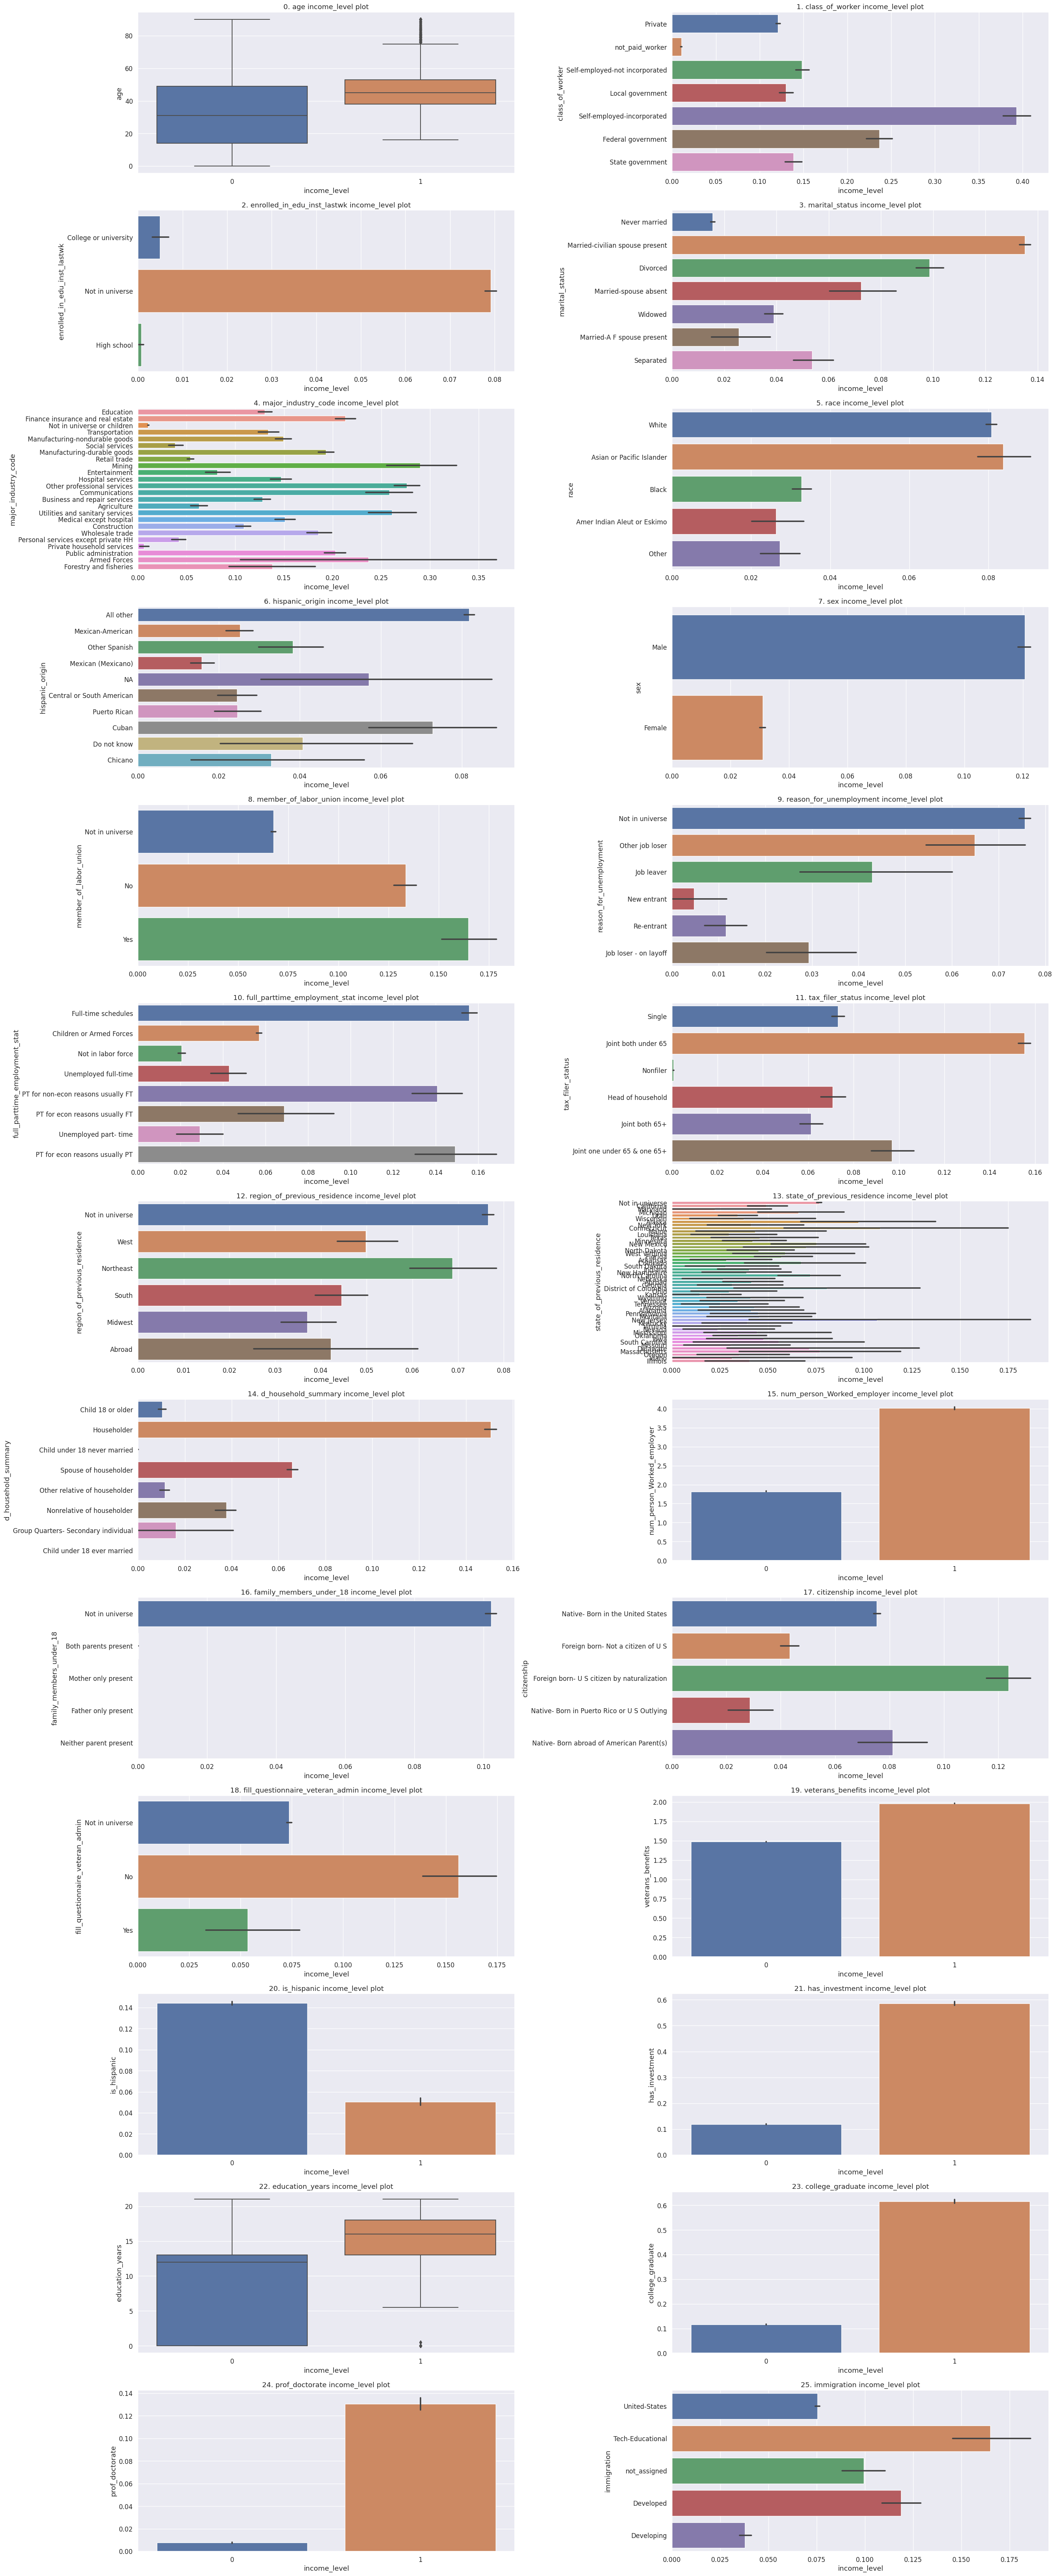

In [ ]:
# sns.set(font_scale=1.1)
# axes = axes.flatten()
fig_income, axes_income = plt.subplots(13,2, figsize=(28,68))

# fig.tight_layout()

i = 0
for col in census_df.columns:
  if(col != 'income_level'):

    if(col == "age" or col=="education_years"):
      sns.boxplot(ax=axes_income[i//2,i%2], data=census_df, x="income_level", y=col)
    else:
      sns.barplot(ax=axes_income[i//2,i%2], data=census_df, x="income_level", y=col)

    title = "{seq}. {column_name} income_level plot".format(seq=i, column_name=col)
    axes_income[i//2,i%2].set_title(title)
    i = i+1

plt.tight_layout()

#### Data Visualization on Pie Chart

In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.colors as plc
from plotly.subplots import make_subplots

In [ ]:
def bar_and_pie_chart_plotly_v2(dataframe, feature):
    fig = make_subplots(rows=1, cols=3)

    less_than_50000 = dataframe[dataframe['income_level']==0][feature].value_counts()
    more_than_50000 = dataframe[dataframe['income_level']==1][feature].value_counts()

    bc_df = pd.DataFrame([ less_than_50000, more_than_50000])
    bc_df.index = ['Less than $50,000 (0)', 'More than $50,000 (1)']
    # fig = px.bar(bc_df)

    labels1 = dataframe.loc[dataframe['income_level'] == 0][feature].value_counts().reset_index()['index']
    values1 = dataframe.loc[dataframe['income_level'] == 0][feature].value_counts().reset_index()[feature]

    labels2 = dataframe.loc[dataframe['income_level'] == 1][feature].value_counts().reset_index()['index']
    values2 = dataframe.loc[dataframe['income_level'] == 1][feature].value_counts().reset_index()[feature]

    fig = make_subplots(rows=1, cols=3, subplot_titles=['Total population - Bar','Income Level = 0', 'Income Level = 1'],
                      specs=[[{'type': 'bar'}, {'type': 'pie'}, {'type': 'pie'}]])

    # trace0 = go.Bar(x=bc_df.columns, y=bc_df)
    trace0 = go.Box(x=dataframe['income_level'], y=dataframe[feature], name='boxplot')
    trace1 = go.Pie(labels=labels1, values=values1)
    trace2 = go.Pie(labels=labels2, values=values2)


    # trace0.textfont = {'size': 16}
    trace1.textfont = {'size': 16}
    trace2.textfont = {'size': 16}

    fig.add_trace(trace0, row=1, col=1)
    fig.add_trace(trace1, row=1, col=2)
    fig.add_trace(trace2, row=1, col=3)

    fig.update_layout(
        title='Education Years Plot with Income Level',
        legend=dict(
            font=dict(
                size=18  # Set the font size of the legend
            )
        ),
    xaxis=dict(
        title='Income Level 0/1',
        title_font=dict(size=20),  # Set font size for x-axis label
        tickfont=dict(size=16)
    ),
    yaxis=dict(
        title=feature,
        title_font=dict(size=20) , # Set font size for y-axis label
        tickfont=dict(size=16)
    )
    )

    # Update subplot titles and axis labels
    fig.update_layout(width=2400, height=1000)
    # Show the plot
    fig.show()

In [ ]:
bar_and_pie_chart_plotly_v2(census_df, 'education_years')

### Visualization on Pie Chart

In [ ]:
def pie_chart_vis(dataframe, feature):
    fig = make_subplots(rows=1, cols=2)

    # labels1 = dataframe[feature].value_counts().reset_index()['index']
    # values1 = dataframe[feature].value_counts().reset_index()[feature]

    labels1 = dataframe.loc[dataframe['income_level'] == 0][feature].value_counts().reset_index()['index']
    values1 = dataframe.loc[dataframe['income_level'] == 0][feature].value_counts().reset_index()[feature]

    labels2 = dataframe.loc[dataframe['income_level'] == 1][feature].value_counts().reset_index()['index']
    values2 = dataframe.loc[dataframe['income_level'] == 1][feature].value_counts().reset_index()[feature]

    fig = make_subplots(rows=1, cols=2, subplot_titles=['Income Level = 0', 'Income Level = 1'],
                        specs=[[{'type': 'pie'}, {'type': 'pie'}]])


    trace1 = go.Pie(labels=labels1, values=values1)
    trace2 = go.Pie(labels=labels2, values=values2)

    trace1.textfont = {'size': 16}
    trace2.textfont = {'size': 16}

    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=1, col=2)


    fig.update_layout(
        title=f'{feature.capitalize()} Percentage Plot',
        legend=dict(
            font=dict(
                size=14  # Set the font size of the legend
            )
        )
    )

    # Update subplot titles and axis labels
    fig.update_layout(width=1600, height=800)
    # Show the plot
    fig.show()

In [ ]:
pie_chart_vis(census_df, 'major_industry_code')

In [ ]:
pie_chart_vis(census_df, 'marital_status')

## C. Machine Learning Model

### Preserve Original DataFrame

In [ ]:
df_original = census_df.copy()
df_original.describe()

age  num_person_Worked_employer  veterans_benefits  \
count  200000.000000               200000.000000      200000.000000   
mean       34.662495                    1.983780           1.522860   
std        22.225765                    2.372892           0.846346   
min         0.000000                    0.000000           0.000000   
25%        16.000000                    0.000000           2.000000   
50%        33.000000                    1.000000           2.000000   
75%        50.000000                    4.000000           2.000000   
max        90.000000                    6.000000           2.000000   

        income_level    is_hispanic  has_investment  education_years  \
count  200000.000000  200000.000000   200000.000000    200000.000000   
mean        0.074360       0.137275        0.153310         9.562395   
std         0.262357       0.344138        0.360287         5.987608   
min         0.000000       0.000000        0.000000         0.000000   
25%         0.000000       0.000000        0.000000         5.500000   
50%         0.000000       0.000000        0.000000        12.000000   
75%         0.000000       0.000000        0.000000        13.000000   
max         1.000000       1.000000        1.000000        21.000000   

       college_graduate  prof_doctorate  
count     200000.000000   200000.000000  
mean           0.154070        0.016720  
std            0.361017        0.128221  
min            0.000000        0.000000  
25%            0.000000        0.000000  
50%            0.000000        0.000000  
75%            0.000000        0.000000  
max            1.000000        1.000000

In [ ]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   age                               200000 non-null  int64  
 1   class_of_worker                   200000 non-null  object 
 2   enrolled_in_edu_inst_lastwk       200000 non-null  object 
 3   marital_status                    200000 non-null  object 
 4   major_industry_code               200000 non-null  object 
 5   race                              200000 non-null  object 
 6   hispanic_origin                   199408 non-null  object 
 7   sex                               200000 non-null  object 
 8   member_of_labor_union             200000 non-null  object 
 9   reason_for_unemployment           200000 non-null  object 
 10  full_parttime_employment_stat     200000 non-null  object 
 11  tax_filer_status                  200000 non-null  o

### Standardization and Adjust Feature Data Type

In [ ]:
census_df['age'] = (census_df['age'] - census_df['age'].min())/(census_df['age'].max() - census_df['age'].min());
census_df['education_years'] = (census_df['education_years'] - census_df['education_years'].min())/(census_df['education_years'].max() - census_df['education_years'].min());
census_df['num_person_Worked_employer'] = (census_df['num_person_Worked_employer'] - census_df['num_person_Worked_employer'].min())/(census_df['num_person_Worked_employer'].max() - census_df['num_person_Worked_employer'].min());
census_df['veterans_benefits'] = census_df['veterans_benefits'].astype(object)
census_df['is_hispanic'] = census_df['is_hispanic'].astype(object)
census_df['has_investment'] = census_df['has_investment'].astype(object)
census_df['college_graduate'] = census_df['college_graduate'].astype(object)
census_df['prof_doctorate'] = census_df['prof_doctorate'].astype(object)

In [ ]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   age                               200000 non-null  float64
 1   class_of_worker                   200000 non-null  object 
 2   enrolled_in_edu_inst_lastwk       200000 non-null  object 
 3   marital_status                    200000 non-null  object 
 4   major_industry_code               200000 non-null  object 
 5   race                              200000 non-null  object 
 6   hispanic_origin                   199408 non-null  object 
 7   sex                               200000 non-null  object 
 8   member_of_labor_union             200000 non-null  object 
 9   reason_for_unemployment           200000 non-null  object 
 10  full_parttime_employment_stat     200000 non-null  object 
 11  tax_filer_status                  200000 non-null  o

### Write Feature Engineered Dataset to File

In [ ]:
census_df.drop(columns=['fill_questionnaire_veteran_admin', 'state_of_previous_residence', 'region_of_previous_residence', 'hispanic_origin', 'reason_for_unemployment', 'full_parttime_employment_stat', 'citizenship'], inplace=True)

In [ ]:
df = pd.get_dummies(census_df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 74 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   age                                                       200000 non-null  float64
 1   num_person_Worked_employer                                200000 non-null  float64
 2   income_level                                              200000 non-null  int64  
 3   education_years                                           200000 non-null  float64
 4   class_of_worker_Local government                          200000 non-null  uint8  
 5   class_of_worker_Private                                   200000 non-null  uint8  
 6   class_of_worker_Self-employed-incorporated                200000 non-null  uint8  
 7   class_of_worker_Self-employed-not incorporated            200000 non-null  uint8  
 8   clas

<ipython-input-69-215c5978f307>:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-69-215c5978f307>:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-69-215c5978f307>:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-69-215c5978f307>:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-69-215c5978f307>:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [ ]:
df.to_csv(DRIVE + PATH + MODEL_READY_DATA, index=False)

### Training-Test Split and Test with Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
X = df.drop(columns='income_level')
Y = df['income_level'].astype(float)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Model with test dataset

In [ ]:
rf = RandomForestClassifier(n_estimators=60,max_features=80,min_samples_leaf=60,max_depth=30)
model = rf.fit(X_train, Y_train)
model_prediction = model.predict(X_test)
print(classification_report(Y_test, model_prediction))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     37016
         1.0       0.68      0.36      0.47      2984

    accuracy                           0.94     40000
   macro avg       0.82      0.67      0.72     40000
weighted avg       0.93      0.94      0.93     40000



### Oversampling with imbalanced data
### Method 1: RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=0)
X_train_ros, Y_train_ros = ros.fit_resample(X_train, Y_train)

In [ ]:
Y_train_ros.value_counts()

0.0    148112
1.0    148112
Name: income_level, dtype: int64

### Test with random forest model with RandomOverSampler

In [ ]:
rf = RandomForestClassifier(n_estimators=60,max_features=80,min_samples_leaf=60,max_depth=30)
ros_model = rf.fit(X_train_ros, Y_train_ros)
ros_prediction = ros_model.predict(X_test)
print(classification_report(Y_test, ros_prediction))

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91     37016
         1.0       0.31      0.86      0.46      2984

    accuracy                           0.85     40000
   macro avg       0.65      0.85      0.69     40000
weighted avg       0.94      0.85      0.88     40000



###Method 2: SMOTE (Synthetic Minority Oversampling Technique)
### Random Forest Model

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote= smote.fit_resample(X_train, Y_train)

In [ ]:
Y_train_smote.value_counts()

0.0    148112
1.0    148112
Name: income_level, dtype: int64

In [ ]:
rf2 = RandomForestClassifier(n_estimators=60,max_features=80,min_samples_leaf=60,max_depth=30)
smote_model = rf.fit(X_train_smote, Y_train_smote)
smote_prediction = smote_model.predict(X_test)
print(classification_report(Y_test, smote_prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94     37016
         1.0       0.39      0.72      0.51      2984

    accuracy                           0.90     40000
   macro avg       0.68      0.81      0.72     40000
weighted avg       0.93      0.90      0.91     40000



### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [ ]:
logit_model=sm.Logit(Y_train_smote, X_train_smote)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.306959
         Iterations: 35
                                                                                       Results: Logit
Model:                                                        Logit                                                    Pseudo R-squared:                                         0.557      
Dependent Variable:                                           income_level                                             AIC:                                                      182003.0816
Date:                                                         2023-07-26 01:56                                         BIC:                                                      182776.7992
No. Observations:                                             296224                                                   Log-Likelihood:                                           -90929.    
Df Model:                                                     72            

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



### Next, Drop all features which has P{P>|z|} > 0.05

In [ ]:
cols=['major_industry_code_Not in universe or children', 'd_household_summary_Child under 18 never married', 'd_household_summary_Child under 18 ever married', 'family_members_under_18_Father only present',
      'family_members_under_18_Mother only present', 'family_members_under_18_Neither parent present', 'college_graduate_1']
# cols=['major_industry_code_Not in universe or children', 'd_household_summary_Householder', 'prof_doctorate_1']
X_train_smote.drop(columns=cols, inplace = True)
X_test.drop(columns=cols, inplace = True)

In [ ]:
logit_model=sm.Logit(Y_train_smote, X_train_smote)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306998
         Iterations 11
                                             Results: Logit
Model:                           Logit                         Pseudo R-squared:              0.557      
Dependent Variable:              income_level                  AIC:                           182012.5330
Date:                            2023-07-26 01:56              BIC:                           182712.0585
No. Observations:                296224                        Log-Likelihood:                -90940.    
Df Model:                        65                            LL-Null:                       -2.0533e+05
Df Residuals:                    296158                        LLR p-value:                   0.0000     
Converged:                       1.0000                        Scale:                         1.0000     
No. Iterations:                  11.0000                                                       

### Use solver='newton-cholesky'to make the model coverge faster than the default “lbfgs” solver, because we have most of our features as one-hot-code ones.

In [ ]:
from sklearn import metrics

logreg = LogisticRegression(solver='newton-cholesky')
# logreg = LogisticRegression(solver='saga')
logreg.fit(X_train_smote, Y_train_smote)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[31022  5994]
 [  469  2515]]


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91     37016
         1.0       0.30      0.84      0.44      2984

    accuracy                           0.84     40000
   macro avg       0.64      0.84      0.67     40000
weighted avg       0.93      0.84      0.87     40000



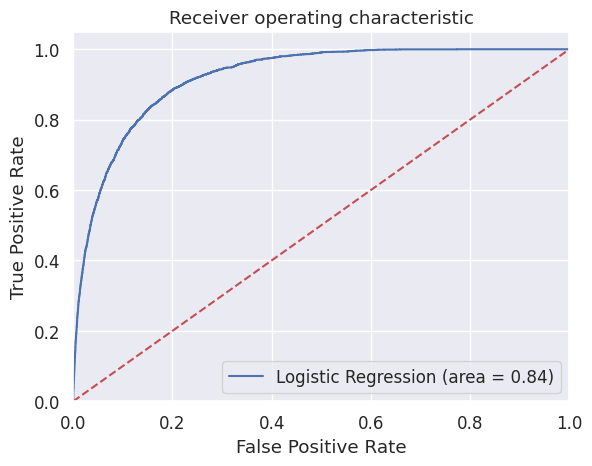

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Note:

**To comapre model performance, the accuracy score is not the whole story. For our purpose, we need pay more attention on Class 1 (income-level > 50K) recall score over precision score. A False Negative is more serious error than False Positive**

**We prefer the SMOTE ranther than ROS because SMOTE works by synthesizing new instances of the minority class between existing instances, but ROS works by randomly replicating instances of the minority class until the class imbalance is mitigated. SMOTE is often preferred when there is limited data in the minority class, as it generates synthetic samples that can enhance the representation of the minority class. On the other hand, RandomOverSampler may be suitable in cases where we have sufficient data in the minority class and want a simpler approach that replicates existing instances. However, in this case, we don't have enought class=1 data. Thus we believe for the above three models, LR > SMOTE RF > ROS RF.**